## Exp1. variation accross leakiness level

In [1]:
#### IMPORT ####
library(ggplot2)
library(RColorBrewer)
library(tidyverse)
# Install and load cowplot package
library(cowplot)
library(glue)
library(gridExtra)

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.2.0     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
✔ purrr   1.0.1     
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
leakiness_df <- read.csv("../results/csv/leakiness_df_0.010.csv")
# combined_df <- data.frame(ID = c("frequency", "concentration","leak1","leak2"), Data = I(list(NA, NA,NA,NA)))
combined_ls <- list()
rxn_order <- c('EX_glc__D_e', 'EX_ile__L_e', 'EX_lys__L_e')

In [4]:
leakiness_df$ile_leakiness

[1] 0.002 0.004 0.006 0.008 0.010

In [7]:
i <- 1
options(scipen = 999) 
phenotypes <- c("02","20","01","10")
# phenotypes <- c("01","10")
# leak1 <- 0.3
replicate <- 1
for (leak1 in leakiness_df$ile_leakiness[3:5]){
    # print(leak1)
    # for (leak2 in leakiness_df$lys_leakiness[3:5]){
    leak2 <- leak1
        print(c(leak1,leak2))
        # strleak1 <- leak1
        # strleak2 <- leak2
        # strleak1 <- toString(format(leak1, nsmall = 4))
        # strleak2 <- toString(format(leak2, nsmall = 4))
        # exp_data <- read.csv(glue("../results/csv/invasion_experiments/invasion-20v02_10_01-36min-ile{leak1}_lys{leak2}_1_3.csv"))
        exp_data <- read.csv(glue("../results/csv/invasion_experiments/invasion-20v02_10_01-36min-ile{leak1}_lys{leak2}_1_3_{replicate}.csv"))
        #determine total time steps
        iteration <- dim(exp_data)[1] 
        #extra - payoff matrix
        payoff_data <- lapply(strsplit(exp_data$payoff, ",\\s*"), function(x) as.numeric(sub("[]|[]", "", x)))

        #plot1 - frequency
        freq_data <- lapply(strsplit(exp_data$frequency, ",\\s*"), function(x) as.numeric(sub("[]|[]", "", x)))
        freq_data <- unlist(freq_data)
        pheno_data <- rep(phenotypes,iteration)
        pheno_data <- unlist(pheno_data)
        abundance_data <- lapply(strsplit(exp_data$abundance, ",\\s*"), function(x) as.numeric(sub("[]|[]", "", x)))
        abundance_data <- unlist(abundance_data)   
        freq_time <- rep(0:(iteration-1), each = length(phenotypes))                        
        #plot2 - concentration
        concentration_data <- lapply(strsplit(exp_data$concentration, ",\\s*"), function(x) as.numeric(sub("[]|[]", "", x))) 
        # concentration_data <- unlist(concentration_data)
        # Separate elements into different lists based on order using a loop
        glucose_data <- vector("list", length(concentration_data))
        ile_data <- vector("list", length(concentration_data))
        lys_data <- vector("list", length(concentration_data))
        for (j in seq_along(concentration_data)) {
          glucose_data[[j]] <- concentration_data[[j]][1]
          ile_data[[j]] <- concentration_data[[j]][2]
            lys_data[[j]] <- concentration_data[[j]][3]
        }
        glucose_data <- unlist(glucose_data)
        ile_data <- unlist(ile_data)
        lys_data <- unlist(lys_data)   
        concentration_time <- 0:(iteration-1)
        # #prepare dataframe for plotting
        frequency_df <- data.frame(
          time_step = freq_time,
          frequency = freq_data,
            pheno = pheno_data
        )
        concentration_df <- data.frame(
          time_step = concentration_time,
            glucose = glucose_data,
          ile = ile_data,
            lys = lys_data
        )
        # concentration_df$reactions <- as.character(concentration_df$reactions )
                   #                
        #store data
        combined_tmp <- list(frequency =I(list(frequency_df)),concentration = I(list(concentration_df)), ile_leakiness = leak1, 
                            lys_leakiness = leak2,payoff = payoff_data)   
        # print(combined_tmp)
        combined_ls[[i]] <- combined_tmp
                                     # print(combined_ls)
        i <- i + 1                  

    }
# }


[1] 0.006 0.006
[1] 0.008 0.008
[1] 0.01 0.01


In [24]:
example_0.1 <- combined_ls[[2]]$payoff[[12]]
example_0.1 <- round(example_0.1, 3)
payoff_values <- matrix(example_0.1)
payoff_matrix2 <- matrix(payoff_values, nrow = length(phenotypes), ncol = length(phenotypes), byrow = TRUE)
colnames(payoff_matrix2) <- phenotypes
rownames(payoff_matrix2) <- phenotypes
payoff_matrix2 <- format(payoff_matrix2, nsmall =3)
payoff_matrix2

,02,20,01,10
02,0.000,0.276,0.000,0.000
20,0.233,0.000,0.000,0.000
01,0.000,0.276,0.000,0.000
10,0.233,0.000,0.000,0.000


In [14]:
example_0.2 <- combined_ls[[5]]$payoff[[19]]
example_0.2 <- round(example_0.2, 3)
payoff_values <- matrix(example_0.2)
payoff_matrix2 <- matrix(payoff_values, nrow = length(phenotypes), ncol = length(phenotypes), byrow = TRUE)
colnames(payoff_matrix2) <- phenotypes
rownames(payoff_matrix2) <- phenotypes
payoff_matrix2 <- format(payoff_matrix2, nsmall =3)
payoff_matrix2

,02,20,01,10
02,0.151,0.153,0.151,0.151
20,0.165,0.125,0.125,0.125
01,0.151,0.265,0.151,0.151
10,0.266,0.125,0.125,0.125


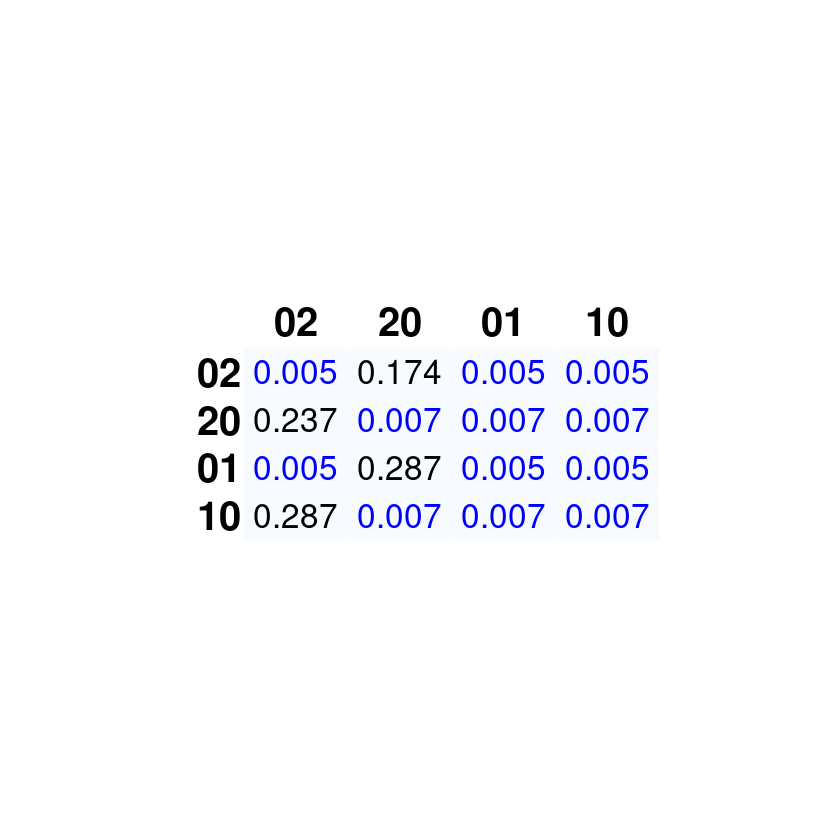

In [17]:
# Format the matrix as a table using kable
# table <- kable(payoff_matrix2, format = "html") 
# print(table)# You can choose other formats like "latex" too

cols <- matrix("black", nrow(payoff_matrix2), ncol(payoff_matrix2))
cols[2,2:4] <- c("blue")
cols[1,1] <- c("blue")
cols[1,3:4]<- c("blue")
cols[4,2:4] <- c("blue")
cols[3,1] <- c("blue")
cols[3,3:4]<- c("blue")
tt3 <- ttheme_minimal(
  core=list(bg_params = list(fill = blues9[1],col= NA),
            fg_params=list(col = cols,fontface=1,fontsize=20)),
  colhead=list(fg_params=list(vjust = 0.4, fontface="bold",fontsize=24)),
  rowhead=list(fg_params=list( hjust = 1, fontface="bold",fontsize=24)))
p<-tableGrob(payoff_matrix2,theme=tt3)
grid.arrange(p)
# ind <- find_cell(g, 3, 2, "core-fg")
# ind2 <- find_cell(g, 2, 3, "core-bg")
# g$grobs[1][[1]][["gp"]] <- gpar(fontsize=15, fontface="bold")
ggsave(
  "../results/png/payoff_diff15.png",
   grid.arrange(p), 
  # grid.arrange(grobs=plot_list1, ncol=3, widths = rep(4, 3), heights = rep(8, 3)),
  width = 5,
  height = 5,
  dpi = 100
    # bg = "transparent"
)


In [130]:
options(scipen = 999) 
example_0.3 <- combined_ls[[9]]$payoff[[5]]
example_0.3 <- round(example_0.3, 6)
payoff_values <- matrix(example_0.3)
payoff_matrix3 <- matrix(payoff_values, nrow = length(phenotypes), ncol = length(phenotypes), byrow = TRUE)
colnames(payoff_matrix3) <- phenotypes
rownames(payoff_matrix3) <- phenotypes
payoff_matrix3

,02,20,01,10
02,0.000014,0.119031,0.000014,0.000014
20,0.133801,0.000010,0.000010,0.000010
01,0.000014,0.287709,0.000014,0.000014
10,0.288505,0.000010,0.000010,0.000010


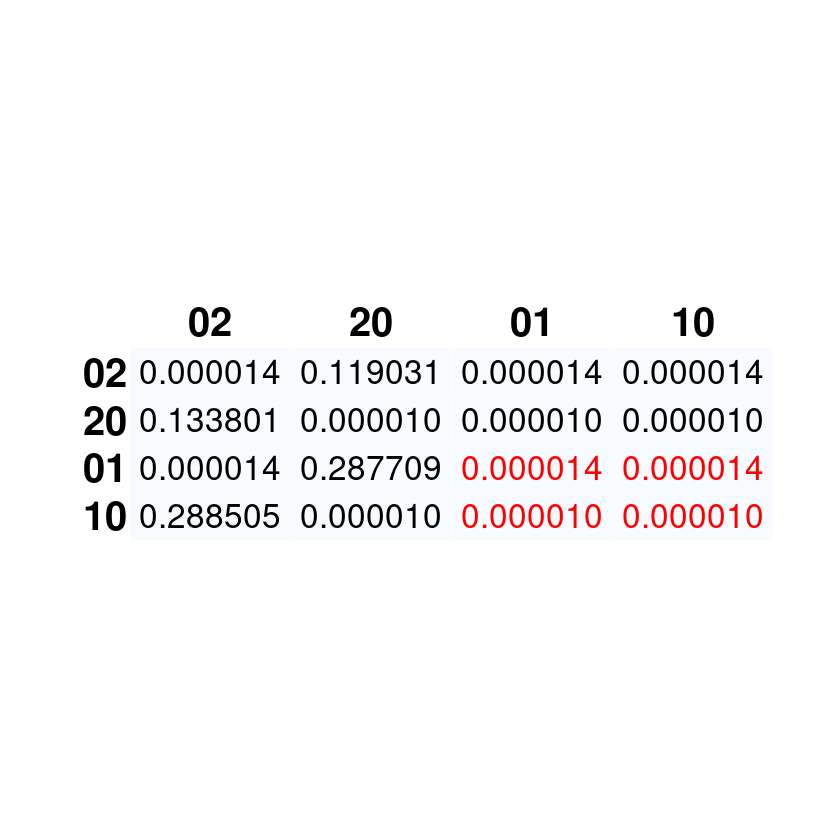

In [136]:
# Format the matrix as a table using kable
# table <- kable(payoff_matrix2, format = "html") 
# print(table)# You can choose other formats like "latex" too
payoff_matrix3 <- format(payoff_matrix3, nsmall =6)
cols <- matrix("black", nrow(payoff_matrix3), ncol(payoff_matrix3))
cols[3:4,3:4] <- c("red")
# cols[4,4] <- c("red")
tt3 <- ttheme_minimal(
  core=list(bg_params = list(fill = blues9[1],col= NA),
            fg_params=list(col = cols,fontface=1,fontsize=20)),
  colhead=list(fg_params=list(vjust = 0.4, fontface="bold",fontsize=24)),
  rowhead=list(fg_params=list( hjust = 1, fontface="bold",fontsize=24)))
p<-tableGrob(payoff_matrix3,theme=tt3)
grid.arrange(p)
# ind <- find_cell(g, 3, 2, "core-fg")
# ind2 <- find_cell(g, 2, 3, "core-bg")
# g$grobs[1][[1]][["gp"]] <- gpar(fontsize=15, fontface="bold")
ggsave(
  "../results/png/payoff0_3.png",
   grid.arrange(p), 
  # grid.arrange(grobs=plot_list1, ncol=3, widths = rep(4, 3), heights = rep(8, 3)),
  width = 15,
  height = 5,
  dpi = 100
    # bg = "transparent"
)


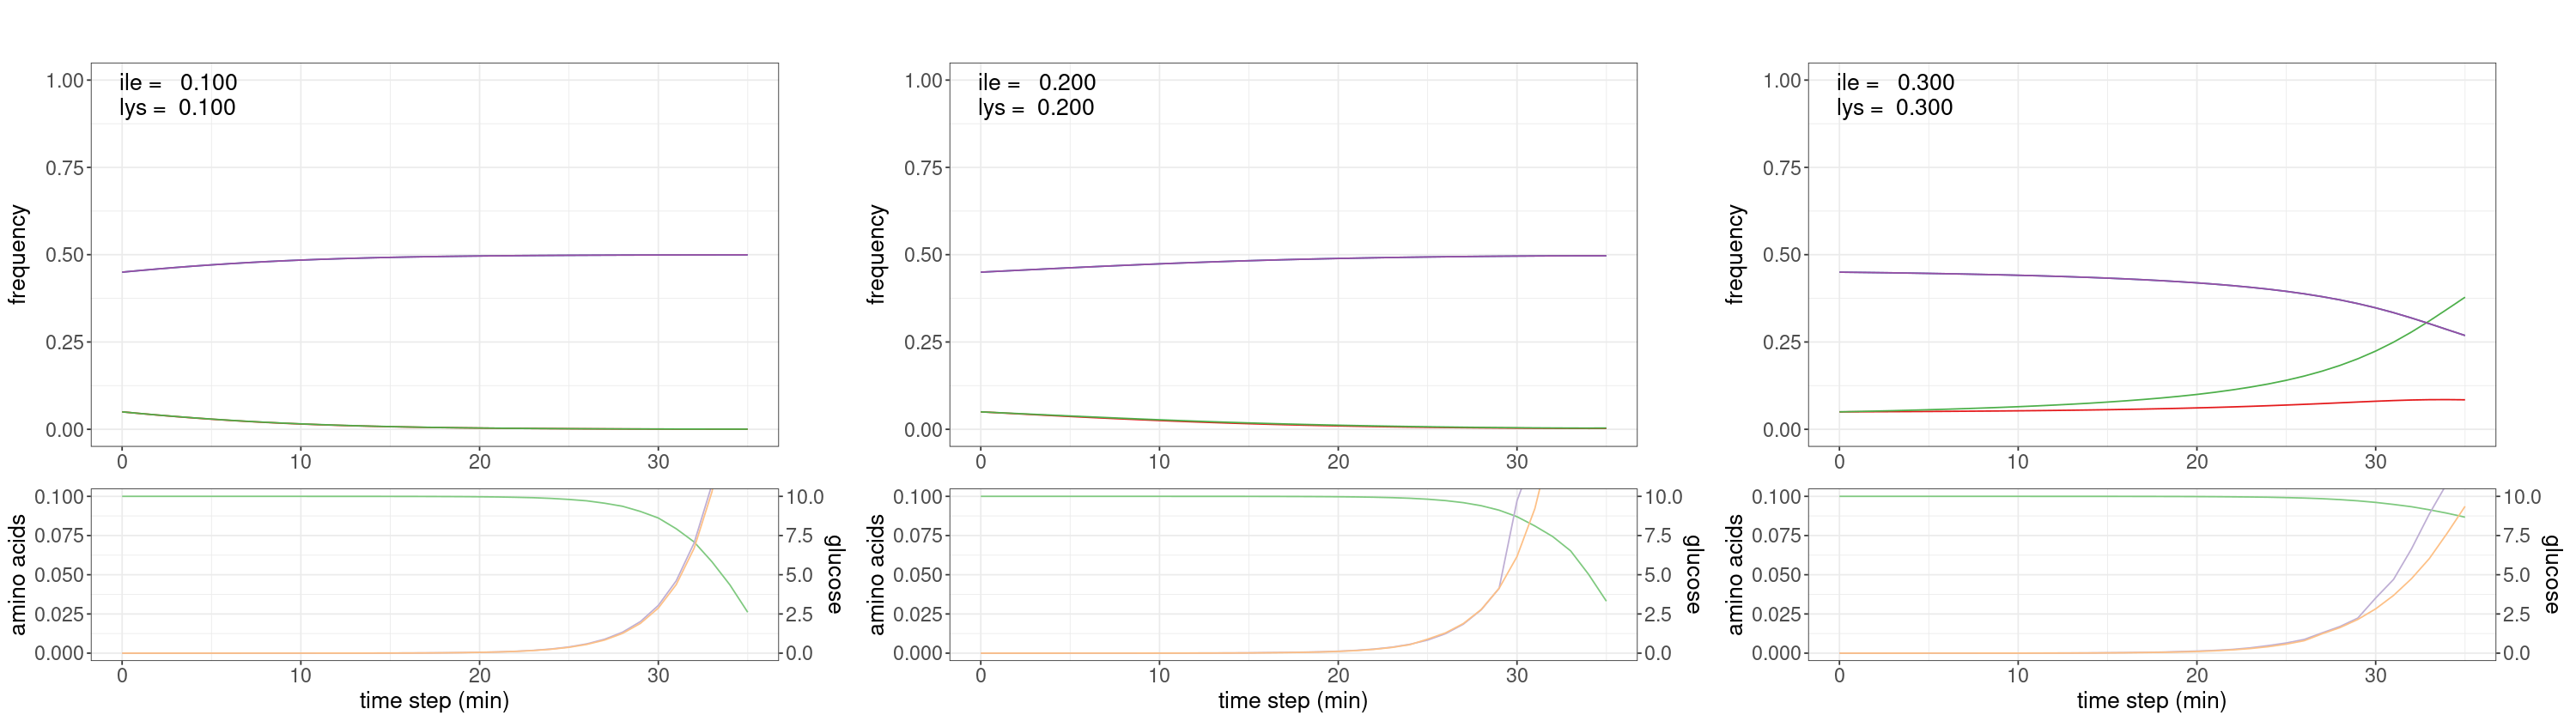

In [15]:
#below threshold
##### Assuming you have a list of 25 datasets named dataset_list
# rxn_order <- c('EX_glc__D_e', 'EX_arg__L_e', 'EX_orn_e', 'EX_leu__L_e')
combined_ls3 <- combined_ls[c(1,5,9)]
options(repr.plot.width = 25, repr.plot.height =7)
plot_list1 <- lapply(combined_ls3, function(exp_data){
  # Create a plot for each dataset, e.g., ggplot2 plot
# Create line plot for dataset 1
    # print(exp_data$frequency[[1]])
    leak1 <- format(exp_data$ile_leakiness, nsmall=3)
    leak2 <- format(exp_data$lys_leakiness, nsmall=3)
    frequency_df <- exp_data$frequency[[1]]
    concentration_df <- exp_data$concentration[[1]]
    plot1 <- ggplot(frequency_df, aes(x = time_step, y = frequency,color = pheno)) +
      geom_line() +
      labs(title = paste("ile =  ",leak1,"\nlys = ",leak2), 
          x = NULL, y = "frequency")+
  coord_cartesian(xlim = c(0, (iteration-1)), ylim = c(0., 1.)) +
        scale_color_brewer(palette="Set1")+
        theme_bw()+
          theme(plot.title = element_text(hjust = 0.05, vjust = -12, size = 16),
                legend.position = "none",axis.text = element_text(size = 14),axis.title = element_text(size = 16))
         #               panel.background = element_rect(fill='transparent'),
         # plot.background = element_rect(fill='transparent', color=NA),
         # panel.grid.major = element_blank(),
         # panel.grid.minor = element_blank()
               

    # Create line plot for dataset 2
       # scale_color_brewer(palette="Accent") +
        #     # labs(color = "Metabolite concentrations") +
#      if (leak1 <=0.3 & leak2 <= 0.3){
#         concentration_df$glucose <- concentration_df$glucose * 0.1
#      plot2 <- ggplot(concentration_df, aes(x = time_step)) +
#           geom_line(aes(y = glucose, color = "D-Glucose")) +
#           geom_line(aes(y = ile, color = "L-Isoleucine"))  +
#           geom_line(aes(y = lys, color = "L-Lysine")) +
#           scale_color_manual(values = c("D-Glucose" = "#7FC97F", "L-Isoleucine" = "#BEAED4", "L-Lysine" = "#FDC086")) +
#         labs(x = "time step (min)", y = "amino acids")+
#         coord_cartesian(xlim = c(0, (iteration -1)), ylim = c(0., 1.))+
#                   scale_y_continuous(sec.axis = sec_axis(~ . * 10, name = "glucose")) + 
#          theme_bw() +
#           theme(legend.position = "none",axis.text = element_text(size = 12),axis.title = element_text(size = 14),
#                                       panel.background = element_rect(fill='transparent'),
#          plot.background = element_rect(fill='transparent', color=NA),
#          panel.grid.major = element_blank(),
#          panel.grid.minor = element_blank()) 
# }
#     # Combine plots vertically}
#     else{ 
        concentration_df$glucose <- concentration_df$glucose * 0.01
        plot2 <- ggplot(concentration_df, aes(x = time_step)) +
          geom_line(aes(y = glucose, color = "D-Glucose")) +
          geom_line(aes(y = ile, color = "L-Isoleucine"))  +
          geom_line(aes(y = lys, color = "L-Lysine")) +
          scale_color_manual(values = c("D-Glucose" = "#7FC97F", "L-Isoleucine" = "#BEAED4", "L-Lysine" = "#FDC086")) +
        labs(x = "time step (min)", y = "amino acids")+
         coord_cartesian(xlim = c(0, (iteration -1)), ylim = c(0., 0.1))+
                  scale_y_continuous(sec.axis = sec_axis(~ . * 100, name = "glucose"))+ 
         theme_bw() +
          theme(legend.position = "none",axis.text = element_text(size = 14),axis.title = element_text(size = 16)#,
         #                              panel.background = element_rect(fill='transparent'),
         # plot.background = element_rect(fill='transparent', color=NA),
         # panel.grid.major = element_blank(),
         # panel.grid.minor = element_blank()
               )
    # }
    
    combined_plot <- plot_grid(plot1, plot2, ncol = 1,rel_heights = c(2, 1), align = "v")#,rel_heights = c(2, 1)
    return(combined_plot)
                     }
)
# plot_list2 <- lapply(combined_ls2, function(exp_data) {


plot1 <- grid.arrange(grobs = plot_list1, ncol=3, width=rep(4,3), height=rep(4,1))
# grid.arrange(grobs=plot_list1, ncol=4, widths = rep(4, 4), heights = rep(8, 4))
# Arrange plots in a 5x5 grid
# ggsave(
#   "../results/png/invasionSmall0.10-20_02v10_01-36min-ile_lys_1_3_no3.png",
#   grid.arrange(grobs=plot_list1, ncol=3, widths = rep(4, 3), heights = rep(8, 1)),
#   width = 25,
#   height = 7,
#   dpi = 100,
#     bg = "transparent"
# )


In [2]:
leakiness_df <- read.csv("../results/csv/leakiness_df_0.010.csv")
leakiness_df <- leakiness_df[3:5,]
leakiness_df

,X,ile_leakiness,lys_leakiness
,<int>,<dbl>,<dbl>
3,2,0.006,0.006
4,3,0.008,0.008
5,4,0.010,0.010


In [30]:
#big loop
leakiness_df <- read.csv("../results/csv/leakiness_df_4.csv")
leakiness_df <- leakiness_df[1:3,]
# combined_df <- data.frame(ID = c("frequency", "concentration","leak1","leak2"), Data = I(list(NA, NA,NA,NA)))

rxn_order <- c('EX_glc__D_e', 'EX_ile__L_e', 'EX_lys__L_e')
phenotypes <- c("02","20","01","10")
for (replicate in 0:9){
i = 1
combined_ls <- list()
    # replicate <- 1
    for (leak1 in leakiness_df$ile_leakiness){
    # print(leak1)
    for (leak2 in leakiness_df$lys_leakiness){
        # print(c(leak1,leak2))
    # leak2 <- leak1
        exp <- read.csv(glue("../results/csv/invasion_experiments/invasion-20v02_10_01-36min-ile{leak1}_lys{leak2}_1_3_{replicate}_refADD.csv"))
        # exp_data <- read.csv(glue("../results/csv/invasion_experiments/crossfeeding-20v02-36min-ile{strleak1}_lys{strleak2}_1_3.csv"))
        #determine total time steps
        iteration <- dim(exp)[1] 
        # print(c(replicate,leak1,leak2))
        #extra - payoff matrix
        # payoff_data <- lapply(strsplit(exp_data$payoff, ",\\s*"), function(x) as.numeric(sub("[]|[]", "", x)))

        #plot1 - frequency
        freq_data <- lapply(strsplit(exp$frequency, ",\\s*"), function(x) as.numeric(sub("[]|[]", "", x)))
        freq_data <- unlist(freq_data)
        pheno_data <- rep(phenotypes,iteration)
        pheno_data <- unlist(pheno_data)
        abundance_data <- lapply(strsplit(exp$abundance, ",\\s*"), function(x) as.numeric(sub("[]|[]", "", x)))
        abundance_data <- unlist(abundance_data)   
        freq_time <- rep(0:(iteration-1), each = length(phenotypes))                        
        #plot2 - concentration
        concentration_data <- lapply(strsplit(exp$concentration, ",\\s*"), function(x) as.numeric(sub("[]|[]", "", x))) 
        # concentration_data <- unlist(concentration_data)
        # Separate elements into different lists based on order using a loop
        glucose_data <- vector("list", length(concentration_data))
        ile_data <- vector("list", length(concentration_data))
        lys_data <- vector("list", length(concentration_data))
        for (j in seq_along(concentration_data)) {
          glucose_data[[j]] <- concentration_data[[j]][1]
          ile_data[[j]] <- concentration_data[[j]][2]
            lys_data[[j]] <- concentration_data[[j]][3]
        }
        glucose_data <- unlist(glucose_data)
        ile_data <- unlist(ile_data)
        lys_data <- unlist(lys_data)   
        concentration_time <- 0:(iteration-1)
        # #prepare dataframe for plotting
        frequency_df <- data.frame(
          time_step = freq_time,
          frequency = freq_data,
            pheno = pheno_data
        )
        concentration_df <- data.frame(
          time_step = concentration_time,
            glucose = glucose_data,
          ile = ile_data,
            lys = lys_data
        )
        # concentration_df$reactions <- as.character(concentration_df$reactions )
                   #                
        #store data
        combined_tmp <- list(frequency =I(list(frequency_df)),concentration = I(list(concentration_df)), ile_leakiness = leak1, 
                            lys_leakiness = leak2)   
        # print(combined_tmp)
        combined_ls[[i]] <- combined_tmp
                                     # print(i)
        i <- i + 1                  

        }
    }
 # print(combined_ls   )                                 
# print(combined_ls[[1]])
#above
##### Assuming you have a list of 25 datasets named dataset_list
# rxn_order <- c('EX_glc__D_e', 'EX_arg__L_e', 'EX_orn_e', 'EX_leu__L_e')
# combined_ls3 <- combined_ls[c(1,5,9)]
                                     # print(replicate)
                                     
options(repr.plot.width = 20, repr.plot.height =14)
plot_list1 <- lapply(combined_ls, function(exp_data){
  # Create a plot for each dataset, e.g., ggplot2 plot
# Create line plot for dataset 1
    leak1 <- format(exp_data$ile_leakiness, nsmall=1)
    leak2 <- format(exp_data$lys_leakiness, nsmall=1)
    # print(c(leak1,leak2))
    # print(exp_data$frequency[[1]][1:3,2])
    # print(frequency_df)
    frequency_df <- exp_data$frequency[[1]]
    # print(frequency_df)
    concentration_df <- exp_data$concentration[[1]]
    plot1 <- ggplot(frequency_df, aes(x = time_step, y = frequency,color = pheno)) +
      geom_line() +
      labs(title = paste("ile =  ",leak1,"\nlys = ",leak2), 
          x = NULL, y = "frequency")+
  coord_cartesian(xlim = c(0, (iteration-1)), ylim = c(0., 1.)) +
        scale_color_brewer(palette="Set1")+
        theme_bw()+
          theme(plot.title = element_text(hjust = 0.05, vjust = -12, size = 18),
                legend.position = "none",axis.text = element_text(size = 14),axis.title = element_text(size = 18),
                       panel.background = element_rect(fill='transparent'),
         plot.background = element_rect(fill='transparent', color=NA),
         panel.grid.major = element_blank(),
         panel.grid.minor = element_blank())
               

    # Create line plot for dataset 2

     # if (leak1 <=0.2 & leak2 <= 0.2){
        concentration_df$glucose <- concentration_df$glucose * 0.1
     plot2 <- ggplot(concentration_df, aes(x = time_step)) +
          geom_line(aes(y = glucose, color = "D-Glucose")) +
          geom_line(aes(y = ile, color = "L-Isoleucine"))  +
          geom_line(aes(y = lys, color = "L-Lysine")) +
          scale_color_manual(values = c("D-Glucose" = "#7FC97F", "L-Isoleucine" = "#BEAED4", "L-Lysine" = "#FDC086")) +
        labs(x = "time step (20 min/step)", y = "amino acids")+
        coord_cartesian(xlim = c(0, (iteration -1)), ylim = c(0., 1.))+
                  scale_y_continuous(sec.axis = sec_axis(~ . * 10, name = "glucose")) + 
         theme_bw() +
          theme(legend.position = "none",axis.text = element_text(size = 14),axis.title = element_text(size = 18),
                                      panel.background = element_rect(fill='transparent'),
         plot.background = element_rect(fill='transparent', color=NA),
         panel.grid.major = element_blank(),
         panel.grid.minor = element_blank()) 
# }
#     # Combine plots vertically}
    # else{ 
    #     concentration_df$glucose <- concentration_df$glucose * 0.001
    #     plot2 <- ggplot(concentration_df, aes(x = time_step)) +
    #       geom_line(aes(y = glucose, color = "D-Glucose")) +
    #       geom_line(aes(y = ile, color = "L-Isoleucine"))  +
    #       geom_line(aes(y = lys, color = "L-Lysine")) +
    #       scale_color_manual(values = c("D-Glucose" = "#7FC97F", "L-Isoleucine" = "#BEAED4", "L-Lysine" = "#FDC086")) +
    #     labs(x = "time step (20 min/step)", y = "amino acids")+
    #      coord_cartesian(xlim = c(0, (iteration -1)), ylim = c(0., 0.01))+
    #               scale_y_continuous(sec.axis = sec_axis(~ . * 1000, name = "glucose"))+ 
    #      theme_bw() +
    #       theme(legend.position = "none",axis.text = element_text(size = 14),axis.title = element_text(size = 18),
    #                                   panel.background = element_rect(fill='transparent'),
    #      plot.background = element_rect(fill='transparent', color=NA),
    #      panel.grid.major = element_blank(),
    #      panel.grid.minor = element_blank()
    #            )
    # }
    
    combined_plot <- plot_grid(plot1, plot2, ncol = 1,rel_heights = c(2, 1), align = "v")#,rel_heights = c(2, 1)
    return(combined_plot)
                     }
)
# plot_list2 <- lapply(combined_ls2, function(exp_data) {
# plot1 <- grid.arrange(grobs = plot_list1, ncol=3, width=rep(4,3), height=rep(4,1))
# grid.arrange(grobs=plot_list1, ncol=3, widths = rep(4, 3), heights = rep(8, 3))
# Arrange plots in a 5x5 grid
ggsave(
  glue("../results/png/invasion-20_02v10_01-36min-ile_lys_1_3_{replicate}_refADD.png"),
  grid.arrange(grobs=plot_list1, ncol=3, widths = rep(4, 3), heights = rep(8, 3)),
  width = 20,
  height = 14,
  dpi = 200,
    bg = "transparent"
)
print("plotted")
# plot1 <- grid.arrange(grobs = plot_list1, ncol=3, width=rep(4,3), height=rep(4,3))
# grid.arrange(grobs=plot_list1, ncol=4, widths = rep(4, 4), heights = rep(8, 4))
# Arrange plots in a 5x5 grid
# ggsave(
#  glue( "../results/png/invasionSmallnoADD-36min-ile_lys_1_3.png"),
#   grid.arrange(grobs=plot_list1, ncol=3, widths = rep(4, 3), heights = rep(8, 1)),
#   width = 20,
#   height = 5,
#   dpi = 100
#     # bg = "transparent"
# )
# dev.off()
                                     }

[1] 0.45 0.45 0.05
[1] 0.45 0.45 0.05
[1] 0.45 0.45 0.05
[1] 0.45 0.45 0.05
[1] 0.45 0.45 0.05
[1] 0.45 0.45 0.05
[1] 0.45 0.45 0.05
[1] 0.45 0.45 0.05
[1] 0.45 0.45 0.05
[1] "plotted"
[1] 0.45 0.45 0.05
[1] 0.45 0.45 0.05
[1] 0.45 0.45 0.05
[1] 0.45 0.45 0.05
[1] 0.45 0.45 0.05
[1] 0.45 0.45 0.05
[1] 0.45 0.45 0.05
[1] 0.45 0.45 0.05
[1] 0.45 0.45 0.05
[1] "plotted"
[1] 0.45 0.45 0.05
[1] 0.45 0.45 0.05
[1] 0.45 0.45 0.05
[1] 0.45 0.45 0.05
[1] 0.45 0.45 0.05
[1] 0.45 0.45 0.05
[1] 0.45 0.45 0.05
[1] 0.45 0.45 0.05
[1] 0.45 0.45 0.05
[1] "plotted"
[1] 0.45 0.45 0.05
[1] 0.45 0.45 0.05
[1] 0.45 0.45 0.05
[1] 0.45 0.45 0.05
[1] 0.45 0.45 0.05
[1] 0.45 0.45 0.05
[1] 0.45 0.45 0.05
[1] 0.45 0.45 0.05
[1] 0.45 0.45 0.05
[1] "plotted"
[1] 0.45 0.45 0.05
[1] 0.45 0.45 0.05
[1] 0.45 0.45 0.05
[1] 0.45 0.45 0.05
[1] 0.45 0.45 0.05
[1] 0.45 0.45 0.05
[1] 0.45 0.45 0.05
[1] 0.45 0.45 0.05
[1] 0.45 0.45 0.05
[1] "plotted"
[1] 0.45 0.45 0.05
[1] 0.45 0.45 0.05
[1] 0.45 0.45 0.05
[1] 0.45 0.45 0.05

null device 
          1

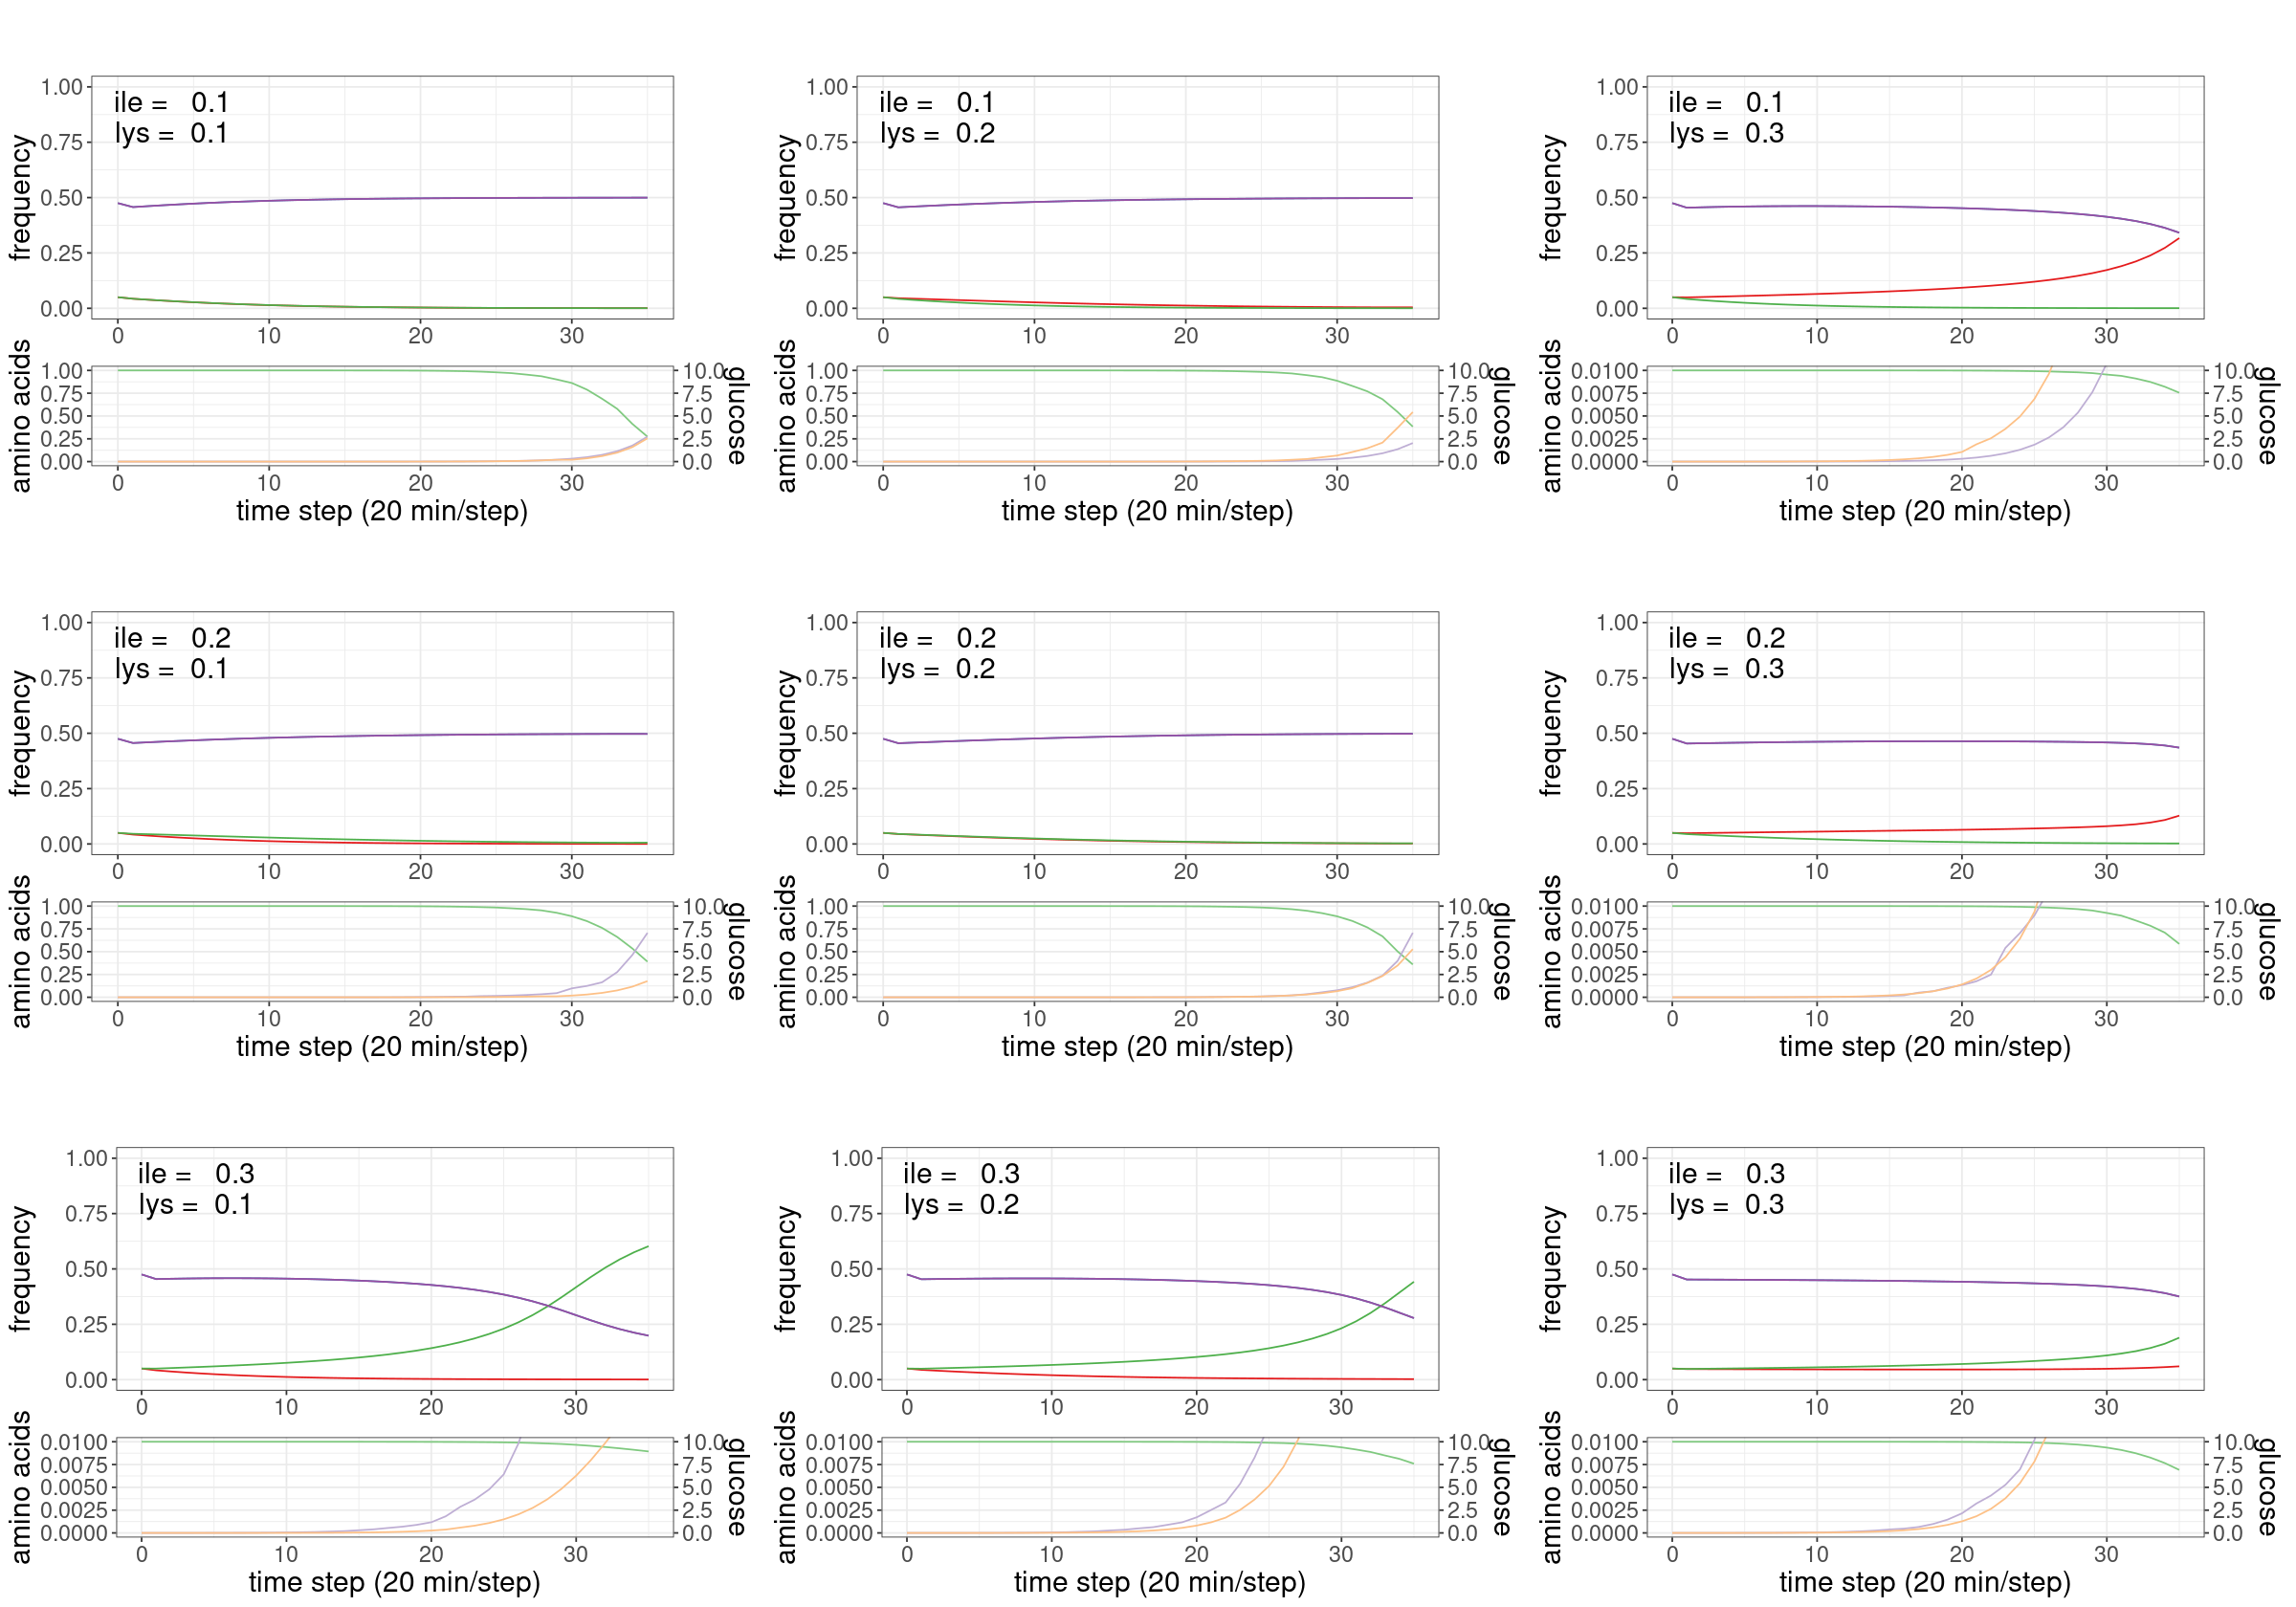

In [173]:
#above
##### Assuming you have a list of 25 datasets named dataset_list
# rxn_order <- c('EX_glc__D_e', 'EX_arg__L_e', 'EX_orn_e', 'EX_leu__L_e')
# combined_ls3 <- combined_ls[c(1,5,9)]
options(repr.plot.width = 20, repr.plot.height =14)
plot_list1 <- lapply(combined_ls, function(exp_data){
  # Create a plot for each dataset, e.g., ggplot2 plot
# Create line plot for dataset 1
    leak1 <- format(exp_data$ile_leakiness, nsmall=1)
    leak2 <- format(exp_data$lys_leakiness, nsmall=1)
    frequency_df <- exp_data$frequency[[1]]
    concentration_df <- exp_data$concentration[[1]]
    plot1 <- ggplot(frequency_df, aes(x = time_step, y = frequency,color = pheno)) +
      geom_line() +
      labs(title = paste("ile =  ",leak1,"\nlys = ",leak2), 
          x = NULL, y = "frequency")+
  coord_cartesian(xlim = c(0, (iteration-1)), ylim = c(0., 1.)) +
        scale_color_brewer(palette="Set1")+
        theme_bw()+
          theme(plot.title = element_text(hjust = 0.05, vjust = -12, size = 18),
                legend.position = "none",axis.text = element_text(size = 14),axis.title = element_text(size = 18))
         #               panel.background = element_rect(fill='transparent'),
         # plot.background = element_rect(fill='transparent', color=NA),
         # panel.grid.major = element_blank(),
         # panel.grid.minor = element_blank()
               

    # Create line plot for dataset 2

     if (leak1 <=0.2 & leak2 <= 0.2){
        concentration_df$glucose <- concentration_df$glucose * 0.1
     plot2 <- ggplot(concentration_df, aes(x = time_step)) +
          geom_line(aes(y = glucose, color = "D-Glucose")) +
          geom_line(aes(y = ile, color = "L-Isoleucine"))  +
          geom_line(aes(y = lys, color = "L-Lysine")) +
          scale_color_manual(values = c("D-Glucose" = "#7FC97F", "L-Isoleucine" = "#BEAED4", "L-Lysine" = "#FDC086")) +
        labs(x = "time step (20 min/step)", y = "amino acids")+
        coord_cartesian(xlim = c(0, (iteration -1)), ylim = c(0., 1.))+
                  scale_y_continuous(sec.axis = sec_axis(~ . * 10, name = "glucose")) + 
         theme_bw() +
          theme(legend.position = "none",axis.text = element_text(size = 14),axis.title = element_text(size = 18))#,
                                      # panel.background = element_rect(fill='transparent'),
         # plot.background = element_rect(fill='transparent', color=NA),
         # panel.grid.major = element_blank(),
         # panel.grid.minor = element_blank()) 
}
#     # Combine plots vertically}
    else{ 
        concentration_df$glucose <- concentration_df$glucose * 0.001
        plot2 <- ggplot(concentration_df, aes(x = time_step)) +
          geom_line(aes(y = glucose, color = "D-Glucose")) +
          geom_line(aes(y = ile, color = "L-Isoleucine"))  +
          geom_line(aes(y = lys, color = "L-Lysine")) +
          scale_color_manual(values = c("D-Glucose" = "#7FC97F", "L-Isoleucine" = "#BEAED4", "L-Lysine" = "#FDC086")) +
        labs(x = "time step (20 min/step)", y = "amino acids")+
         coord_cartesian(xlim = c(0, (iteration -1)), ylim = c(0., 0.01))+
                  scale_y_continuous(sec.axis = sec_axis(~ . * 1000, name = "glucose"))+ 
         theme_bw() +
          theme(legend.position = "none",axis.text = element_text(size = 14),axis.title = element_text(size = 18)#,
         #                              panel.background = element_rect(fill='transparent'),
         # plot.background = element_rect(fill='transparent', color=NA),
         # panel.grid.major = element_blank(),
         # panel.grid.minor = element_blank()
               )
    }
    
    combined_plot <- plot_grid(plot1, plot2, ncol = 1,rel_heights = c(2, 1), align = "v")#,rel_heights = c(2, 1)
    return(combined_plot)
                     }
)
# plot_list2 <- lapply(combined_ls2, function(exp_data) {


# plot1 <- grid.arrange(grobs = plot_list1, ncol=3, width=rep(4,3), height=rep(4,3))
# grid.arrange(grobs=plot_list1, ncol=4, widths = rep(4, 4), heights = rep(8, 4))
# Arrange plots in a 5x5 grid
ggsave(
  "../results/png/invasion-20_02v10_01-36min-ile_lys_1_3_no9_noAddition.png",
  grid.arrange(grobs=plot_list1, ncol=3, widths = rep(4, 3), heights = rep(8, 3)),
  width = 20,
  height = 14,
  dpi = 200
    # bg = "transparent"
)
dev.off()

### single plot for legend

In [190]:
combined_single <- read.csv("../results/csv/invasion_experiments/invasion-20v02_10_01-36min-ile0.1_lys0.1_1_3_5.csv")

## Exp2. variation accross entry timestep

In [31]:
i <- 1
iteration <- 120
phenotypes <- c("01","10","00")
combined_ls <- c()
step <- 1
for (leak in c(0.1,0.2,0.3,0.4)){
        exp_data <- read.csv(glue("../results/csv/invasion_experiments/invasion-10_01v00-{iteration}min-ile{leak}_lys{leak}.csv"))
        #determine total time steps
        time_span <- dim(exp_data)[1] 
        #plot1 - frequency
        freq_data <- lapply(strsplit(exp_data$frequency, ",\\s*"), function(x) as.numeric(sub("[]|[]", "", x)))
        freq_data <- unlist(freq_data)
        # print(freq_data[1:7])
        pheno_data <- rep(phenotypes,time_span)
        pheno_data <- unlist(pheno_data)
        # print(pheno_data[1:7])                    
        abundance_data <- lapply(strsplit(exp_data$abundance, ",\\s*"), function(x) as.numeric(sub("[]|[]", "", x)))
        abundance_data <- unlist(abundance_data)   
        freq_time <- rep(0:(time_span-1), each = length(phenotypes)) 
        # print(freq_time[1:7])                        
        #plot2 - concentration
        concentration_data <- lapply(strsplit(exp_data$concentration, ",\\s*"), function(x) as.numeric(sub("[]|[]", "", x))) 
        concentration_data <- unlist(concentration_data)
        rxn_data <- rep(rxn_order,time_span)
        rxn_data <- unlist(rxn_data)     
        concentration_time <- rep(0:(time_span-1), each = length(rxn_order))  
        #prepare dataframe for plotting
        frequency_df <- data.frame(
          time_step = freq_time,
          frequency = freq_data,
            pheno = pheno_data
        )
        concentration_df <- data.frame(
          time_step = concentration_time,
          concentration = concentration_data,
            reactions = rxn_data
        )
        concentration_df$reactions <- as.character(concentration_df$reactions )
                                     
        #store data
        combined_tmp <- list(frequency =I(list(frequency_df)), concentration = I(list(concentration_df)),
                             ile_leakiness = leak, lys_leakiness = leak, entry_step = step)                            
        combined_ls[[i]] <- combined_tmp
        i <- i + 1                  

    
}


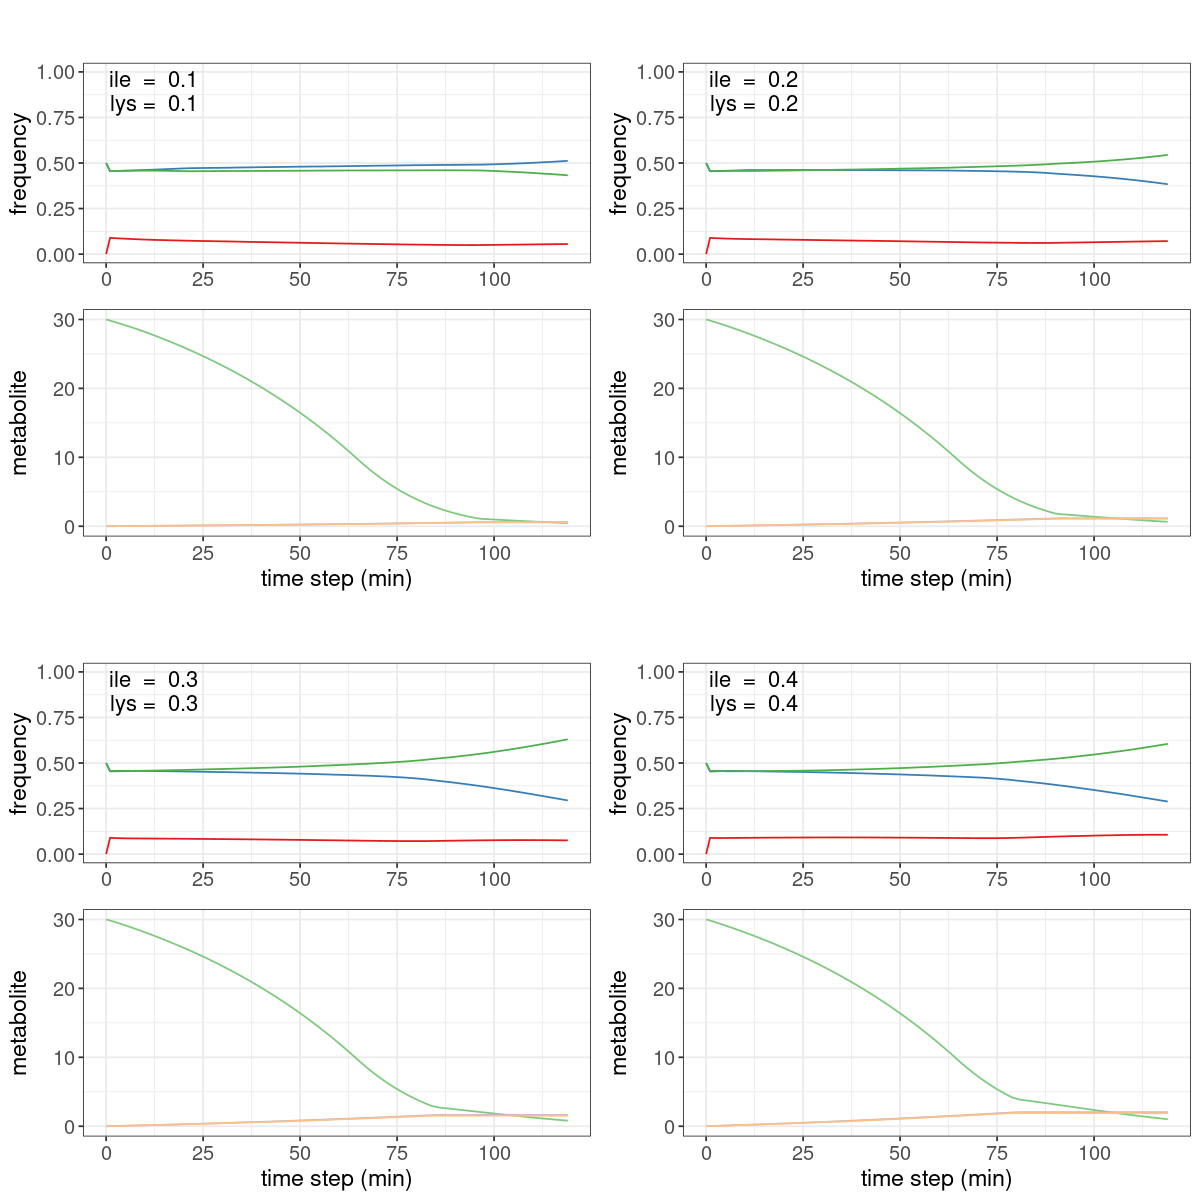

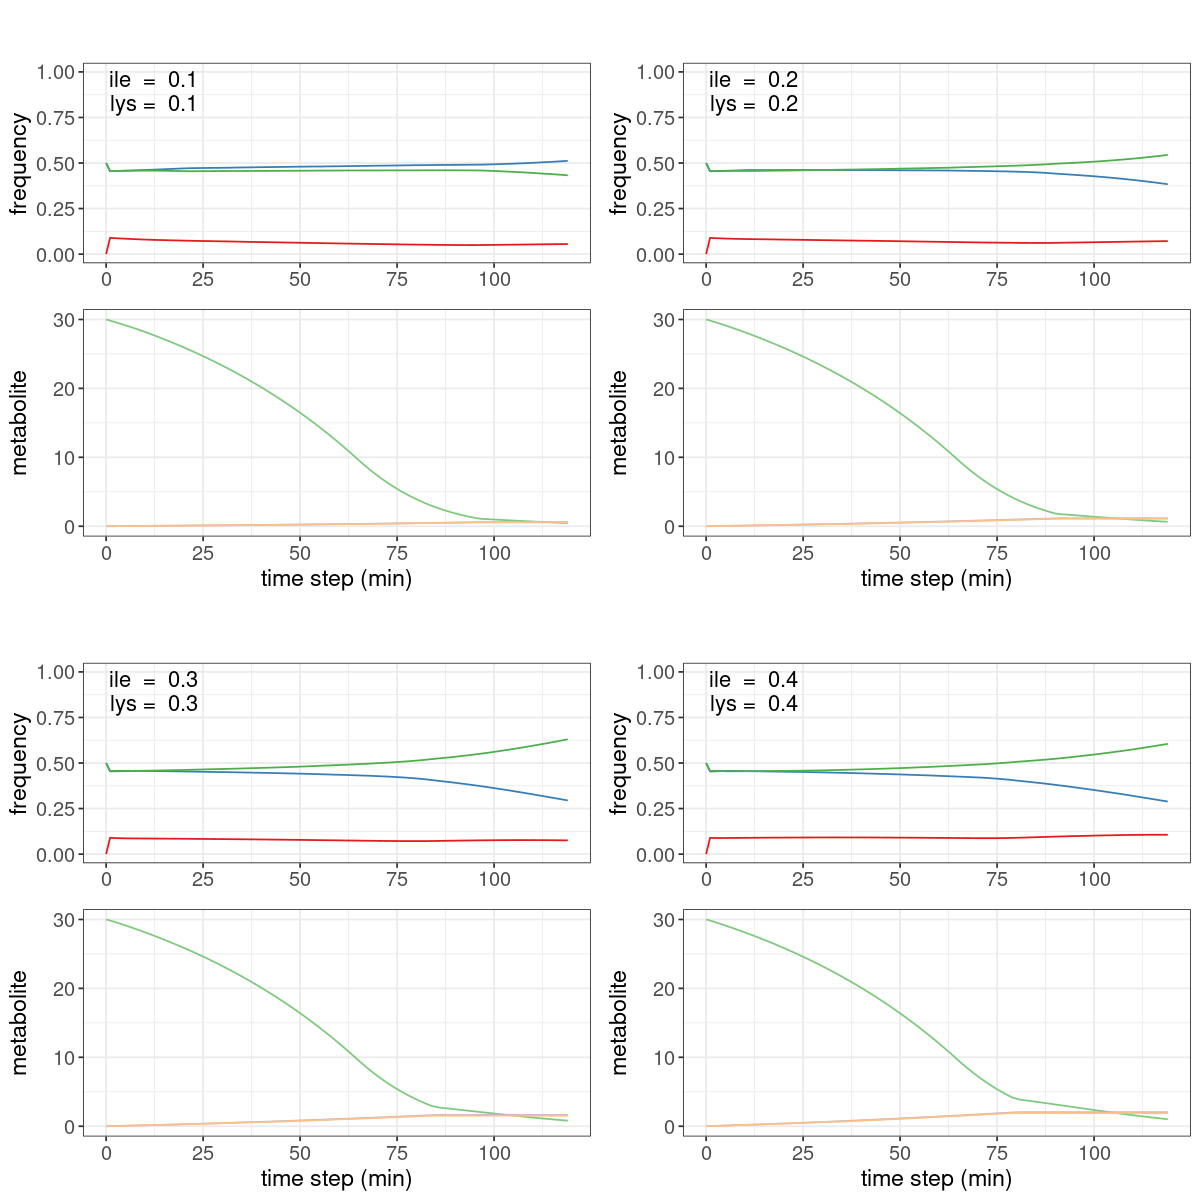

In [28]:
# Assuming you have a list of 25 datasets named dataset_list
# rxn_order <- c('EX_glc__D_e', 'EX_arg__L_e', 'EX_orn_e', 'EX_leu__L_e')

options(repr.plot.width = 10, repr.plot.height =10)
plot_list <- lapply(combined_ls, function(exp_data) {
  # Create a plot for each dataset, e.g., ggplot2 plot
# Create line plot for dataset 1
    frequency_df <- exp_data$frequency[[1]]
    concentration_df <- exp_data$concentration[[1]]
    plot1 <- ggplot(frequency_df, aes(x = time_step, y = frequency,color = pheno)) +
      geom_line() +
      labs(title = paste(" ile  = ",exp_data$ile_leakiness, "\n lys = ", exp_data$lys_leakiness), 
          x = NULL, y = "frequency")+
  coord_cartesian(xlim = c(0, (iteration -1)), ylim = c(0., 1.)) +
        scale_color_brewer(palette="Set1")+
        theme_bw()+
          theme(plot.title = element_text(hjust = 0.05, vjust = -12),
                legend.position = "none",axis.text = element_text(size = 12),axis.title = element_text(size = 14)) 

    # Create line plot for dataset 2
    plot2 <- ggplot(concentration_df, aes(x = time_step, y = concentration,color = factor(reactions, levels= rxn_order))) +
      geom_line() +
      labs(x = "time step (min)", y = "metabolite")+
        scale_color_brewer(palette="Accent") +
        theme_bw()+
            # labs(color = "Metabolite concentrations") +
          theme(legend.position = "none",axis.text = element_text(size = 12),axis.title = element_text(size = 14)) 

    # Combine plots vertically
    combined_plot <- plot_grid(plot1, plot2, ncol = 1, align = "v")
    return(combined_plot)
})

grid.arrange(grobs=plot_list, ncol=2, widths = rep(5, 2), heights = rep(10, 2))

# Arrange plots in a 5x5 grid
ggsave(
  "../results/png/invasion-10_01v00-120min-ile_lys.png",
  grid.arrange(grobs=plot_list, ncol=2, widths = rep(4, 2), heights = rep(4, 2)),
  width = 10,
  height = 10,
  dpi = 100
)


### single plot for legend

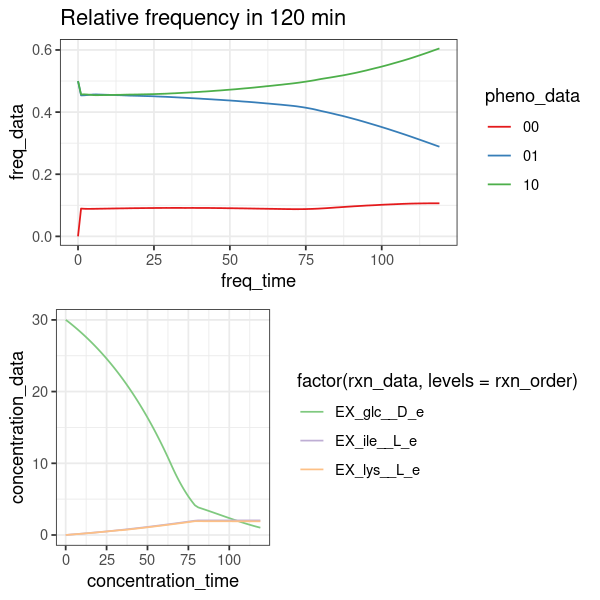

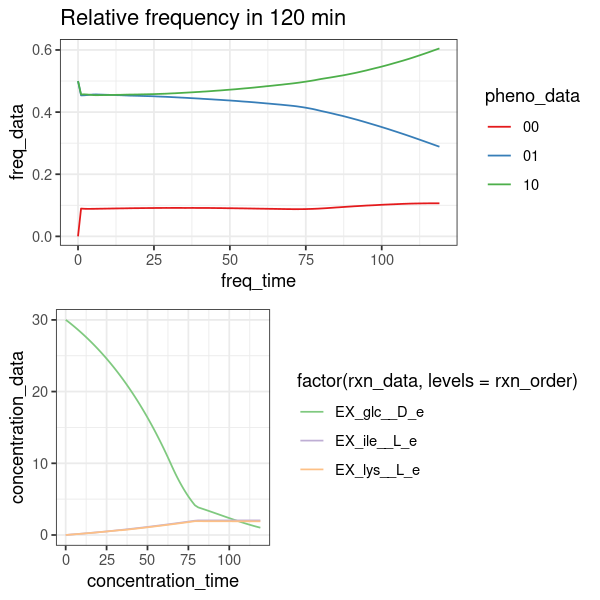

In [35]:
exp_data <- combined_ls[[1]]
frequency_df <- exp_data$frequency[[1]]
concentration_df <- exp_data$concentration[[1]]
options(repr.plot.width = 5, repr.plot.height =5)
# Create line plot for dataset 1
plot1 <- ggplot(frequency_df, aes(x = freq_time, y = freq_data,color = pheno_data)) +
  geom_line() +
  # geom_point() +
  labs(title = "Relative frequency in 120 min")+
    scale_color_brewer(palette="Set1")+
    theme_bw()+
        # labs(color = "Phenotypes") +
      theme(legend.position = "right") 

# Create line plot for dataset 2
plot2 <- ggplot(concentration_df, aes(x = concentration_time, y = concentration_data,color = factor(rxn_data, levels= rxn_order))) +
  geom_line() +
  # geom_point() +
  # labs(title = "Metabolite concentration in 60 min")+
    scale_color_brewer(palette="Accent") +
    theme_bw()+
        # labs(color = "Metabolite concentrations") +
      theme(legend.position = "right") 


# Combine plots vertically
combined_plot <- plot_grid(plot1, plot2, ncol = 1)

# Display the combined plot
print(combined_plot)
# Arrange plots in a 5x5 grid
ggsave(
  "../results/png/invasion-10_01v00-120min-ile_lys_legend.png",
  print(combined_plot),
  width = 5,
  height = 5,
  dpi = 100
)


In [25]:
str(plot_list)

List of 40
 $ :List of 9
  ..$ data       : list()
  .. ..- attr(*, "class")= chr "waiver"
  ..$ layers     :List of 2
  .. ..$ :Classes 'LayerInstance', 'Layer', 'ggproto', 'gg' <ggproto object: Class LayerInstance, Layer, gg>
    aes_params: list
    compute_aesthetics: function
    compute_geom_1: function
    compute_geom_2: function
    compute_position: function
    compute_statistic: function
    computed_geom_params: NULL
    computed_mapping: NULL
    computed_stat_params: NULL
    constructor: call
    data: data.frame
    draw_geom: function
    finish_statistics: function
    geom: <ggproto object: Class GeomDrawGrob, GeomCustomAnn, Geom, gg>
        aesthetics: function
        default_aes: uneval
        draw_group: function
        draw_key: function
        draw_layer: function
        draw_panel: function
        extra_params: 
        handle_na: function
        non_missing_aes: 
        optional_aes: 
        parameters: function
        rename_size: FALSE
        re

## Exp3. Graphing combo of secretion and uptake rates

In [3]:
#### IMPORT ####
library(ggplot2)
library(RColorBrewer)
library(tidyverse)
# Install and load cowplot package
library(cowplot)
library(glue)
library(gridExtra)
library(knitr)
library(webshot)
library(kableExtra)
# library(magick)

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.2.0     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
✔ purrr   1.0.1     
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘kableExtra’


The following object is masked from ‘package:dplyr’:

    group_rows




In [4]:
start = "0.0"
stop = 0.2625
interval = 0.0125

In [148]:
start = "0.0"
stop = 5.05
interval = 0.05

In [6]:
strstart <- as.character(start)
strstop <- as.character(stop)
strint <- as.character(interval)

In [7]:
os_data <- read.csv(glue("../results/csv/one_shot/compare_sec_up_growth_{strstart}_{strstop}_{strint}_sameSec_glc.csv"))

In [137]:
strain20_max <- na.omit(strain20_df[strain20_df$growth >=0.28,])
sec_max <- max(strain20_max$sec, na.rm = T)
strain20_max <- na.omit(strain20_df[strain20_df$growth == max_20,])
up_min <- min(strain20_max$up, na.rm=T)
# up_min
# small_sec <- strain20_df[strain20_df$sec > 0,]
# max(small_sec$growth)
# max_20

[1] 0.1

In [22]:
unique_up <- unique(os_data$up)
strain02_df <- os_data[os_data$key_strain == "ile_lys_02",]
strain20_df <- os_data[os_data$key_strain == "ile_lys_20",]
corr_res <- c()
corr_up <- c()
corr_val <- c()
i = 1
    corTempYear <- function(glc,sec) {

        temp_shuffle <- glc[sample(length(glc))]
        cor_shuffle <- cor(temp_shuffle,sec)

        return(cor_shuffle)
    }
    N <- 100
for (up in unique_up){
        #1 Compute the correlation coefficient between years and temperature
    # glc <- strain02_df[strain02_df$up == up,"glc_flux"]
    # sec <- strain02_df[strain02_df$up == up,"sec"]
    glc <- strain20_df[strain20_df$up == up,"glc_flux"] 
    sec <- strain20_df[strain20_df$up == up,"sec"]
    # cor1 <- cor(glc, sec, method =  c("pearson", "kendall", "spearman"))

    #2 Recalculate correlation coeffient between temperature(random in order) and years
    #permutation test
    if (length(unique(glc)) == 1){
        corObserved <- NA
        p_value_Cor <- NA
    }
    else{

    corPerm <- sapply(1:N, function(i) corTempYear(glc,sec))
    corObserved <- cor(glc,sec)

    #3 Calculate what fraction of the random correlation coefficients were greater than the observed one
    #p-value
    p_value_Cor <- (sum(corPerm>=corObserved)+1)/length(corPerm) #(sum(corPerm>=corObserved)+1)/length(corPerm)
    
    }
    corObserved <- round(corObserved, 3)
    p_value_Cor <- round(p_value_Cor, 3)                  
    corr_res <- c(corr_res, p_value_Cor) 
    corr_up <- c(corr_up, up)
    corr_val <- c(corr_val, corObserved)

}
corr_df <- data.frame(p.value = corr_res, uptake.value = corr_up, corr.value = corr_val)
corr_df

p.value,uptake.value,corr.value
<dbl>,<dbl>,<dbl>
0.06,0.0000,0.351
0.05,0.0125,0.341
0.09,0.0250,0.332
0.09,0.0375,0.332
0.25,0.0500,0.222
0.28,0.0625,0.255
NA,0.0750,NA
0.83,0.0875,-0.185
NA,0.1000,NA


In [23]:
write.csv(corr_df, file="../results/csv/one_shot/compare_sec_up_growth_table20.csv")

In [240]:
#glucose ~ sec
### point plot ###
options(repr.plot.width = 6, repr.plot.height =10)
os_data$glc_flux <- - os_data$glc_flux
# Create line plot for dataset 1
strain02_df <- os_data[os_data$key_strain == "ile_lys_02",]
strain20_df <- os_data[os_data$key_strain == "ile_lys_20",]
# strain02_df$growth[strain02_df$growth < 0] <- NA
# strain20_df$growth[strain20_df$growth < 0] <- NA

plot_list1 <- lapply(strain02_df[1:9], function(exp_data){
  # Create a plot for each dataset, e.g., ggplot2 plot
# Create line plot for dataset 1
print(ex_data)
    
    
    # combined_plot <- plot_grid(plot1, plot2, ncol = 1,rel_heights = c(2, 1), align = "v")#,rel_heights = c(2, 1)
    # return(combined_plot)
                     }
)
# plot_list2 <- lapply(combined_ls2, function(exp_data) {


plot1 <- grid.arrange(grobs = plot_list1, ncol=3, width=rep(4,3), height=rep(4,3))
# grid.arrange(grobs=plot_list1, 
# strain02_df_tmp <- strain02_df[strain02_df$up == 0.0125,]
plot1 <- ggplot(strain02_df, aes(x = sec, y = glc_flux, color = up )) + #x = sec, y = growth, color = up #x = up, y = growth, color = sec
  geom_point() + theme_bw()+
  labs(x = "lys secretion rate", y = "glc rate",
       title = "ile auxotroph growth rate (mmol/gDW/h)")+
  coord_cartesian(ylim = c(0., 10.0))
plot2 <- ggplot(strain20_df, aes(x = sec, y = glc_flux, color = up)) +
  geom_point() + theme_bw()+
  labs(x = "ile uptake rate", y = "growth rate",
       title = "lys auxotroph growth rate (mmol/gDW/h)")+
  coord_cartesian(ylim = c(0., 10.0)) 
  # geom_hline(yintercept = 0.11125)#,rel_heights = c(2, 1)
    #Combine plots vertically
combined_plot <- plot_grid(plot1, plot2, ncol = 1,rel_heights = c(1, 1))

print(combined_plot)

[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0.0125
[1] 0.0125
[1] 0.0125
[1] 0.0125
[1] 0.0125
[1] 0.0125
[1] 0.0125
[1] 0.0125
[1] 0.0125
[1] 0.0125
[1] 0.0125
[1] 0.0125
[1] 0.0125
[1] 0.0125
[1] 0.0125
[1] 0.0125
[1] 0.0125
[1] 0.0125
[1] 0.0125
[1] 0.0125
[1] 0.0125
[1] 0.025
[1] 0.025
[1] 0.025
[1] 0.025
[1] 0.025
[1] 0.025
[1] 0.025
[1] 0.025
[1] 0.025
[1] 0.025
[1] 0.025
[1] 0.025
[1] 0.025
[1] 0.025
[1] 0.025
[1] 0.025
[1] 0.025
[1] 0.025
[1] 0.025
[1] 0.025
[1] 0.025
[1] 0.0375
[1] 0.0375
[1] 0.0375
[1] 0.0375
[1] 0.0375
[1] 0.0375
[1] 0.0375
[1] 0.0375
[1] 0.0375
[1] 0.0375
[1] 0.0375
[1] 0.0375
[1] 0.0375
[1] 0.0375
[1] 0.0375
[1] 0.0375
[1] 0.0375
[1] 0.0375
[1] 0.0375
[1] 0.0375
[1] 0.0375
[1] 0.05
[1] 0.05
[1] 0.05
[1] 0.05
[1] 0.05
[1] 0.05
[1] 0.05
[1] 0.05
[1] 0.05
[1] 0.05
[1] 0.05
[1] 0.05
[1] 0.05
[1] 0.05
[1] 0.05
[1] 0.05
[1] 0.05
[1] 0.05
[1] 0.05
[1] 0.05
[1] 0.05
[1] 0.0625
[1

ERROR: Error in gList(...): only 'grobs' allowed in "gList"


Warning message in max(strain02_df$growth, na.rm = T):
“no non-missing arguments to max; returning -Inf”
Warning message in max(strain20_df$growth, na.rm = T):
“no non-missing arguments to max; returning -Inf”
Warning message in min(strain02_df[strain02_df$growth >= max_02, "sec"]):
“no non-missing arguments to min; returning Inf”


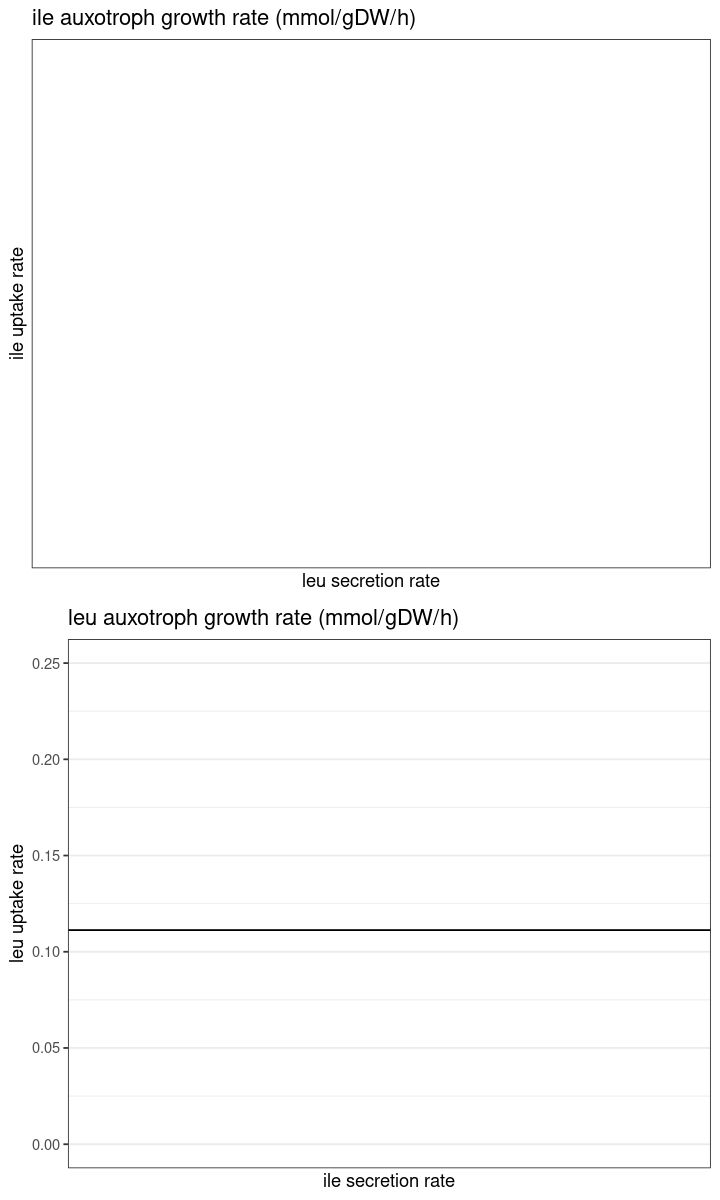

In [55]:
##### Assuming you have a list of 25 datasets named dataset_list
options(repr.plot.width = 6, repr.plot.height =10)

# Create line plot for dataset 1
    strain02_df <- os_data[os_data$key_strain == "ile_leu_02",]
    strain20_df <- os_data[os_data$key_strain == "ile_leu_20",]
strain02_df$growth[strain02_df$growth < 0] <- NA
strain20_df$growth[strain20_df$growth < 0] <- NA
# strain02_df$growth <- as.factor(strain02_df$growth)
max_02 <- max(strain02_df$growth, na.rm = T)
max_20 <- max(strain20_df$growth, na.rm = T)
sec02 <- min(strain02_df[strain02_df$growth >= max_02,"sec"])
# print(sec02)
max_val <- max(max_02, max_20)
plot1 <- ggplot(strain02_df, aes(sec, up, fill =growth)) +
  geom_tile(width=1, height=0.025) + theme_bw()+
  # scale_fill_gradient(low = "blue", high = "red",limits = c(0.,0.3)) +  # Customize gradient colors
  scale_colour_gradientn(colors = c("green","red"),na.value = "grey98")+
  labs(x = "leu secretion rate", y = "ile uptake rate",
       title = "ile auxotroph growth rate (mmol/gDW/h)")+
  coord_cartesian(ylim = c(0., 0.25))
plot2 <- ggplot(strain20_df, aes(sec, up, fill = growth)) +
  geom_tile(width=1, height=0.025) + theme_bw()+
  # scale_fill_gradient(low = "blue", high = "red",limits = c(0.,0.3)) +
  labs(x = "ile secretion rate", y = "leu uptake rate",
       title = "leu auxotroph growth rate (mmol/gDW/h)")+
  coord_cartesian(ylim = c(0., 0.25))+
  geom_hline(yintercept = 0.11125)#,rel_heights = c(2, 1)
    #Combine plots vertically
combined_plot <- plot_grid(plot1, plot2, ncol = 1,rel_heights = c(1, 1))
#         plot2 <- ggplot(concentration_df, aes(x = time_step)) +
#           geom_line(aes(y = glucose, color = "D-Glucose")) +
#           geom_line(aes(y = ile, color = "ile"))  +
#           geom_line(aes(y = leu, color = "leu")) +
#           scale_color_manual(values = c("D-Glucose" = "#7FC97F", "ile" = "#BEAED4", "leu" = "#FDC086")) +
#         labs(x = "time step (min)", y = "amino acids")+
#          coord_cartesian(xlim = c(0, (iteration -1)), ylim = c(0., 0.01))+
#                   scale_y_continuous(sec.axis = sec_axis(~ . * 1000, name = "glucose"))+ 
#          theme_bw() +
#           theme(legend.position = "none",axis.text = element_text(size = 12),axis.title = element_text(size = 14))}
    

print(combined_plot)
# plot1 <- grid.arrange(grobs = plot_list1, ncol=5, width=rep(4,5), height=rep(4,5))
# plot1 <- grid.arrange(grobs = plot_list1, ncol=1, width=rep(4,1), height=rep(4,1))

# plot2 <- grid.arrange(grobs = plot_list2, ncol=1, width=rep(4,1), height=rep(4,5))


# Arrange plots in a 5x5 grid
# ggsave(
#   glue("../results/png/compare_sec_up_growth_{strstart}_{strstop}_{strint}_small.png"),
# print(combined_plot) ,
#     width = 6,
#   height = 10,
#   dpi = 100
# )


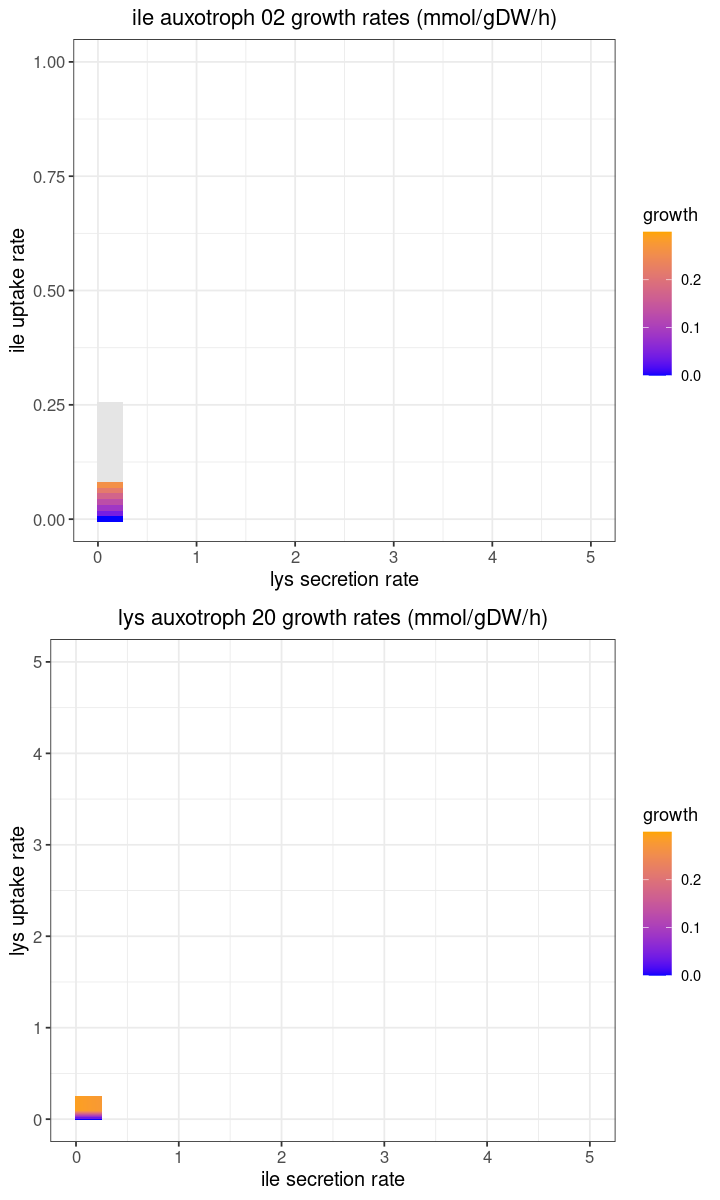

In [ ]:
##### Assuming you have a list of 25 datasets named dataset_list
#0,5.05,0.05,sameSec,fixUp
#max_20 0.28878638777377
#max_02 0.258493988551917
options(repr.plot.width = 6, repr.plot.height =10)

# Create line plot for dataset 1
    strain02_df <- os_data[os_data$key_strain == "ile_lys_02",]
    strain20_df <- os_data[os_data$key_strain == "ile_lys_20",]
# strain02_df <- strain02_df[strain02_df$sec <= 3.00,]
# strain20_df <- strain02_df[strain02_df$sec <= 3.00,]
strain02_df <- strain02_df[strain02_df$up <= 1.0,]
strain02_df$growth[strain02_df$growth < 0] <- NA
strain20_df$growth[strain20_df$growth < 0] <- NA
max_02 <- max(strain02_df$growth, na.rm = T)
max_20 <- max(strain20_df$growth, na.rm = T)
sec02 <- min(strain02_df[strain02_df$growth >= max_02,"sec"])
# print(sec02)
max_val <- max(max_02, max_20)
plot1 <- ggplot(strain02_df, aes(sec, up, fill =growth)) +
   geom_tile() + theme_bw()+ #geom_tile(width=1, height=0.025)
  scale_fill_gradient(low = "blue", high = "orange",limits = c(0.,0.3),na.value = "grey90") +  # Customize gradient colors
  scale_colour_gradientn(colors = c("green","red"),na.value = "black")+
  labs(x = "lys secretion rate", y = "ile uptake rate",
       title = "ile auxotroph 02 growth rates (mmol/gDW/h)")+
  coord_cartesian(xlim = c(0., 5.00),ylim = c(0., 1.00)) +
  theme(plot.title = element_text(hjust = 0.5),
      axis.text.x = element_text(size = 10),  # Adjust the x-axis text size
        axis.text.y = element_text(size = 10),
       axis.title.x = element_text(size = 12),  # Adjust the x-axis text size
        axis.title.y = element_text(size = 12))
plot2 <- ggplot(strain20_df, aes(sec, up, fill = growth)) +
  geom_tile() + theme_bw()+
  scale_fill_gradient(low = "blue", high = "orange",limits = c(0.,0.3)) +
  labs(x = "ile secretion rate", y = "lys uptake rate",
       title = "lys auxotroph 20 growth rates (mmol/gDW/h)")+
  coord_cartesian(xlim = c(0., 5.00),ylim = c(0., 5.00))+
  theme(plot.title = element_text(hjust = 0.5),
      axis.text.x = element_text(size = 10),  # Adjust the x-axis text size
        axis.text.y = element_text(size = 10),
       axis.title.x = element_text(size = 12),  # Adjust the x-axis text size
        axis.title.y = element_text(size = 12))
  # geom_hline(yintercept = 0.11125)#,rel_heights = c(2, 1)
    #Combine plots vertically
combined_plot <- plot_grid(plot1, plot2, ncol = 1,rel_heights = c(1, 1))
#         plot2 <- ggplot(concentration_df, aes(x = time_step)) +
#           geom_line(aes(y = glucose, color = "D-Glucose")) +
#           geom_line(aes(y = ile, color = "ile"))  +
#           geom_line(aes(y = lys, color = "lys")) +
#           scale_color_manual(values = c("D-Glucose" = "#7FC97F", "ile" = "#BEAED4", "lys" = "#FDC086")) +
#         labs(x = "time step (min)", y = "amino acids")+
#          coord_cartesian(xlim = c(0, (iteration -1)), ylim = c(0., 0.01))+
#                   scale_y_continuous(sec.axis = sec_axis(~ . * 1000, name = "glucose"))+ 
#          theme_bw() +
#           theme(legend.position = "none",axis.text = element_text(size = 12),axis.title = element_text(size = 14))}
    

print(combined_plot)
# plot1 <- grid.arrange(grobs = plot_list1, ncol=5, width=rep(4,5), height=rep(4,5))
# plot1 <- grid.arrange(grobs = plot_list1, ncol=1, width=rep(4,1), height=rep(4,1))

# plot2 <- grid.arrange(grobs = plot_list2, ncol=1, width=rep(4,1), height=rep(4,5))


# Arrange plots in a 5x5 grid
# ggsave(
#   glue("../results/png/compare_sec_up_growth_{strstart}_{strstop}_{strint}_sameSec_fixUp.png"),
# print(combined_plot) ,
#     width = 6,
#   height = 10,
#   dpi = 100
# )


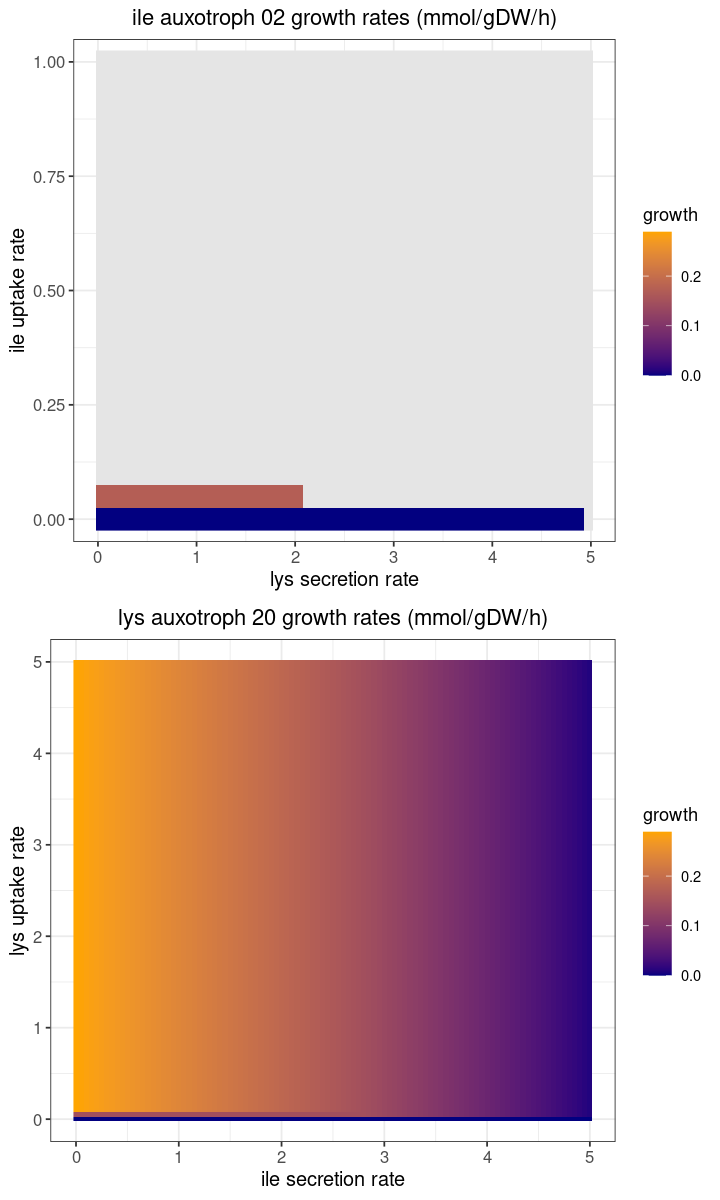

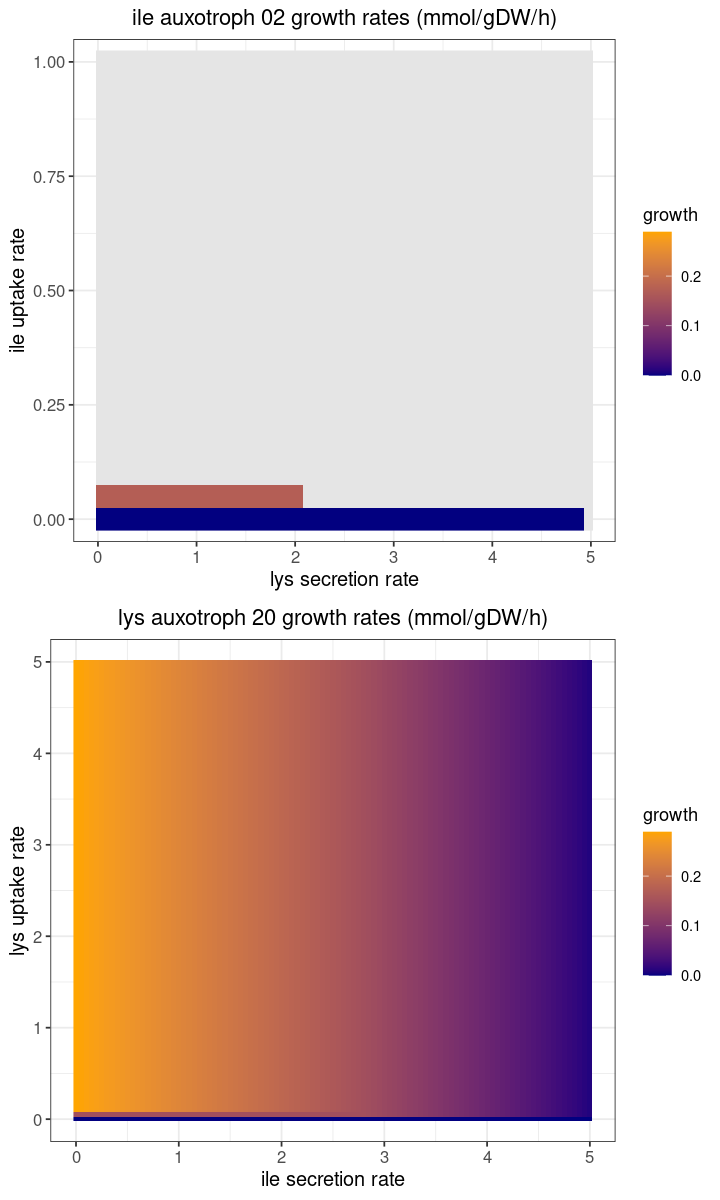

In [155]:
##### Assuming you have a list of 25 datasets named dataset_list
#0,5.05,0.05,sameSec,fixUp
options(repr.plot.width = 6, repr.plot.height =10)
#max_20 0.288786387773771
#max_02 0.258493988551917
# Create line plot for dataset 1
    strain02_df <- os_data[os_data$key_strain == "ile_lys_02",]
    strain20_df <- os_data[os_data$key_strain == "ile_lys_20",]
strain02_df <- strain02_df[strain02_df$up <= 1.0,]
strain02_max <- na.omit(strain02_df[strain02_df$growth == max_02,])
sec_02 <- max(strain02_max$sec, na.rm = T)
strain02_max <- na.omit(strain02_df[strain02_df$growth == max_02,])
up_02 <- min(strain02_max$up, na.rm=T)

strain20_max <- na.omit(strain20_df[strain20_df$growth >=0.28,])
sec_20 <- max(strain20_max$sec, na.rm = T)
strain20_max <- na.omit(strain20_df[strain20_df$growth == max_20,])
up_20 <- min(strain20_max$up, na.rm=T)

strain02_df$growth[strain02_df$growth < 0] <- NA
strain20_df$growth[strain20_df$growth < 0] <- NA
max_02 <- max(strain02_df$growth, na.rm = T)
max_20 <- max(strain20_df$growth, na.rm = T)
sec02 <- min(strain02_df[strain02_df$growth >= max_02,"sec"])
# print(sec02)
max_val <- max(max_02, max_20)
plot1 <- ggplot(strain02_df, aes(sec, up, fill =growth)) +
   geom_raster() + theme_bw()+ #geom_tile(width=1, height=0.025)
  scale_fill_gradient(low = "navy", high = "orange",limits = c(0., 0.2888),na.value = "grey90") +  # Customize gradient colors
  # scale_colour_gradientn(colors = c("green","red"),na.value = "black")+
  labs(x = "lys secretion rate", y = "ile uptake rate",
       title = "ile auxotroph 02 growth rates (mmol/gDW/h)")+
  coord_cartesian(xlim = c(0., 5.00),ylim = c(0., 1.00)) +
  theme(plot.title = element_text(hjust = 0.5),
      axis.text.x = element_text(size = 10),  # Adjust the x-axis text size
        axis.text.y = element_text(size = 10),
       axis.title.x = element_text(size = 12),  # Adjust the x-axis text size
        axis.title.y = element_text(size = 12))
    # scale_fill_viridis_c(limits = c(0., 0.2888),na.value = "grey90",option="H")
  # geom_hline(yintercept = up_02, color = "red", linetype = "dashed")+
  # geom_text(aes(0,up_20,label = up_20, vjust = -1))+
    # geom_vline(xintercept = sec_02, color = "red", linetype = "dashed")
    # scale_fill_viridis_c(limits = c(0., 0.2888),na.value = "grey90",option="C")
plot2 <- ggplot(strain20_df, aes(sec, up, fill = growth)) +
  geom_raster() + theme_bw()+
  scale_fill_gradient(low = "navy", high = "orange",limits = c(0., 0.2888),na.value = "grey90") +
  labs(x = "ile secretion rate", y = "lys uptake rate",
       title = "lys auxotroph 20 growth rates (mmol/gDW/h)")+
  coord_cartesian(xlim = c(0., 5.00),ylim = c(0., 5.00))+
  theme(plot.title = element_text(hjust = 0.5),
      axis.text.x = element_text(size = 10),  # Adjust the x-axis text size
        axis.text.y = element_text(size = 10),
       axis.title.x = element_text(size = 12),  # Adjust the x-axis text size
        axis.title.y = element_text(size = 12))
    # scale_fill_viridis_c(limits = c(0., 0.2888),na.value = "grey90",option="H")
  # geom_hline(yintercept = up_20, color = "red", linetype = "dashed")+
  # geom_text(aes(0,up_20,label = up_20, vjust = -1))+
    # geom_vline(xintercept = sec_20, color = "red", linetype = "dashed")#+
    # geom_vline(xintercept = 0, color = "red", linetype = "dashed")
    # geom_vline(xintercept = 0.0)
    #Combine plots vertically
combined_plot <- plot_grid(plot1, plot2, ncol = 1,rel_heights = c(1, 1))
#         plot2 <- ggplot(concentration_df, aes(x = time_step)) +
#           geom_line(aes(y = glucose, color = "D-Glucose")) +
#           geom_line(aes(y = ile, color = "ile"))  +
#           geom_line(aes(y = lys, color = "lys")) +
#           scale_color_manual(values = c("D-Glucose" = "#7FC97F", "ile" = "#BEAED4", "lys" = "#FDC086")) +
#         labs(x = "time step (min)", y = "amino acids")+
#          coord_cartesian(xlim = c(0, (iteration -1)), ylim = c(0., 0.01))+
#                   scale_y_continuous(sec.axis = sec_axis(~ . * 1000, name = "glucose"))+ 
#          theme_bw() +
#           theme(legend.position = "none",axis.text = element_text(size = 12),axis.title = element_text(size = 14))}
    

print(combined_plot)
# plot1 <- grid.arrange(grobs = plot_list1, ncol=5, width=rep(4,5), height=rep(4,5))
# plot1 <- grid.arrange(grobs = plot_list1, ncol=1, width=rep(4,1), height=rep(4,1))

# plot2 <- grid.arrange(grobs = plot_list2, ncol=1, width=rep(4,1), height=rep(4,5))


# Arrange plots in a 5x5 grid
ggsave(
  glue("../results/png/compare_sec_up_growth_{strstart}_{strstop}_{strint}_sameSec_fixUp.png"),
print(combined_plot) ,
    width = 6,
  height = 10,
  dpi = 200
)


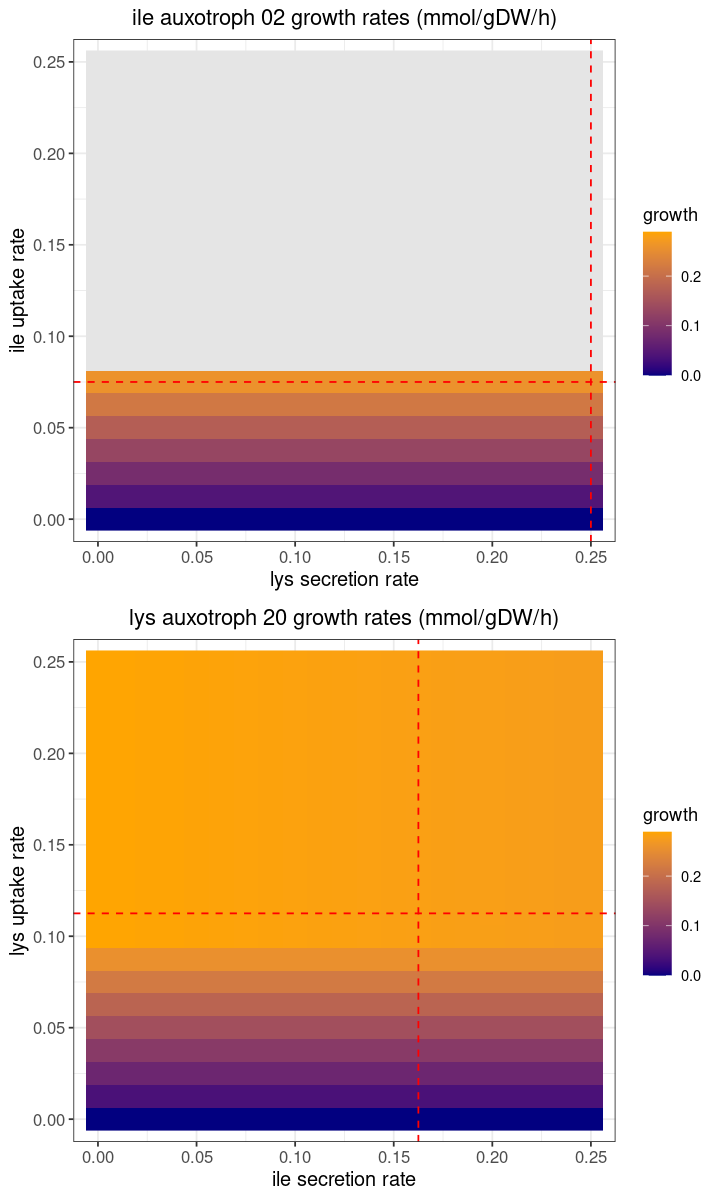

In [229]:
##### Assuming you have a list of 25 datasets named dataset_list
#0,0.25,0.0125,sameSec,fixUp
options(repr.plot.width = 6, repr.plot.height =10)
#max_20 0.288786387773771
#max_02 0.258493988551917
# Create line plot for dataset 1
    strain02_df <- os_data[os_data$key_strain == "ile_lys_02",]
    strain20_df <- os_data[os_data$key_strain == "ile_lys_20",]
strain02_max <- na.omit(strain02_df[strain02_df$growth == max_02,])
sec_02 <- max(strain02_max$sec, na.rm = T)
strain02_max <- na.omit(strain02_df[strain02_df$growth == max_02,])
up_02 <- min(strain02_max$up, na.rm=T)

strain20_max <- na.omit(strain20_df[strain20_df$growth >=0.28,])
sec_20 <- max(strain20_max$sec, na.rm = T)
strain20_max <- na.omit(strain20_df[strain20_df$growth == max_20,])
up_20 <- 0.1125

strain02_df$growth[strain02_df$growth < 0] <- NA
strain20_df$growth[strain20_df$growth < 0] <- NA
max_02 <- max(strain02_df$growth, na.rm = T)
max_20 <- max(strain20_df$growth, na.rm = T)
sec02 <- min(strain02_df[strain02_df$growth >= max_02,"sec"])
# print(sec02)
max_val <- max(max_02, max_20)
plot1 <- ggplot(strain02_df, aes(sec, up, fill =growth)) +
   geom_raster() + theme_bw()+ #geom_tile(width=1, height=0.025)
  scale_fill_gradient(low = "navy", high = "orange",limits = c(0., 0.2888),na.value = "grey90") +  # Customize gradient colors
  # scale_colour_gradientn(colors = c("green","red"),na.value = "black")+
  labs(x = "lys secretion rate", y = "ile uptake rate",
       title = "ile auxotroph 02 growth rates (mmol/gDW/h)")+
  coord_cartesian(xlim = c(0., 0.2500),ylim = c(0., 0.2500)) +
  theme(plot.title = element_text(hjust = 0.5),
      axis.text.x = element_text(size = 10),  # Adjust the x-axis text size
        axis.text.y = element_text(size = 10),
       axis.title.x = element_text(size = 12),  # Adjust the x-axis text size
        axis.title.y = element_text(size = 12))+
    # scale_fill_viridis_c(limits = c(0., 0.2888),na.value = "grey90",option="H")
  geom_hline(yintercept = up_02, color = "red", linetype = "dashed")+
  # geom_text(aes(0,up_20,label = up_20, vjust = -1))+
    geom_vline(xintercept = sec_02, color = "red", linetype = "dashed")
    # scale_fill_viridis_c(limits = c(0., 0.2888),na.value = "grey90",option="C")
plot2 <- ggplot(strain20_df, aes(sec, up, fill = growth)) +
  geom_raster() + theme_bw()+
  scale_fill_gradient(low = "navy", high = "orange",limits = c(0., 0.2888),na.value = "grey90") +
  labs(x = "ile secretion rate", y = "lys uptake rate",
       title = "lys auxotroph 20 growth rates (mmol/gDW/h)")+
  coord_cartesian(xlim = c(0., 0.2500),ylim = c(0., 0.2500))+
  theme(plot.title = element_text(hjust = 0.5),
      axis.text.x = element_text(size = 10),  # Adjust the x-axis text size
        axis.text.y = element_text(size = 10),
       axis.title.x = element_text(size = 12),  # Adjust the x-axis text size
        axis.title.y = element_text(size = 12))+
    # scale_fill_viridis_c(limits = c(0., 0.2888),na.value = "grey90",option="H")
  geom_hline(yintercept = up_20, color = "red", linetype = "dashed")+
  # geom_text(aes(0,up_20,label = up_20, vjust = -1))+
    geom_vline(xintercept = sec_20, color = "red", linetype = "dashed")#+
    # geom_vline(xintercept = 0, color = "red", linetype = "dashed")
    # geom_vline(xintercept = 0.0)
    #Combine plots vertically
combined_plot <- plot_grid(plot1, plot2, ncol = 1,rel_heights = c(1, 1))
#         plot2 <- ggplot(concentration_df, aes(x = time_step)) +
#           geom_line(aes(y = glucose, color = "D-Glucose")) +
#           geom_line(aes(y = ile, color = "ile"))  +
#           geom_line(aes(y = lys, color = "lys")) +
#           scale_color_manual(values = c("D-Glucose" = "#7FC97F", "ile" = "#BEAED4", "lys" = "#FDC086")) +
#         labs(x = "time step (min)", y = "amino acids")+
#          coord_cartesian(xlim = c(0, (iteration -1)), ylim = c(0., 0.01))+
#                   scale_y_continuous(sec.axis = sec_axis(~ . * 1000, name = "glucose"))+ 
#          theme_bw() +
#           theme(legend.position = "none",axis.text = element_text(size = 12),axis.title = element_text(size = 14))}
    

print(combined_plot)
# plot1 <- grid.arrange(grobs = plot_li0.1125st1, ncol=5, width=rep(4,5), height=rep(4,5))
# plot1 <- grid.arrange(grobs = plot_lst1, ncol=1, width=rep(4,1), height=rep(4,1))

# plot2 <- grid.arrange(grobs = plot_list2, ncol=1, width=rep(4,1), height=rep(4,5))


# Arrange plots in a 5x5 grid
# ggsave(
#   glue("../results/png/compare_sec_up_growth_{strstart}_{strstop}_{strint}_sameSec_fixUp.png"),
# print(combined_plot) ,
#     width = 6,
#   height = 10,
#   dpi = 200
# )


In [146]:
up_02

[1] 0.075

## Exp4.Uptakes

In [99]:
exp_data <- combined_single
iteration <- dim(exp_data)[1] 
#extra - payoff matrix
payoff_data <- lapply(strsplit(exp_data$payoff, ",\\s*"), function(x) as.numeric(sub("[]|[]", "", x)))
payoff <- c()                      
for (k in 2:36){
    pay02 <- sum(payoff_data[[k]][1:4])
    pay20 <- sum(payoff_data[[k]][5:8])
    pay01 <- sum(payoff_data[[k]][9:12])
    pay10 <- sum(payoff_data[[k]][13:16])
    payoff <- c(payoff, c(pay02,pay20,pay01,pay10))
}                      
print(length(payoff))                      
#extra - metabolite matrix
metabolite_data <- lapply(strsplit(exp_data$metabolite_ls, ",\\s*"), function(x) unlist(as.list(sub("[]|[]", "", x))))
for (i in 1:36){
    metabolite_data[[i]] <- unname(sapply(metabolite_data[[i]], function(x) as.numeric(sub("[]|[]", "", x))))
}

metabolite_dir <- c()
metabolite_indir <- c()                                          
for (j in 2:36){
     dir02 <- metabolite_data[[j]][4:6]
    dir20 <- metabolite_data[[j]][13:15]
    dir01 <- metabolite_data[[j]][28:30]
    dir10 <- metabolite_data[[j]][37:39]
     indir02 <- metabolite_data[[j]][1:3]
    indir20 <- metabolite_data[[j]][16:18]
    indir01 <- metabolite_data[[j]][31:33]
    indir10 <- metabolite_data[[j]][46:48]
    dir02 <- dir02[dir02 < 0][2]
    dir20 <- dir20[dir20 < 0][2]
    dir01 <- dir01[dir01 < 0][2]
    dir10 <- dir10[dir10 < 0][2]
    indir02 <- indir02[indir02 < 0][2]
    indir20 <- indir20[indir20 < 0][2]
    indir01 <- indir01[indir01 < 0][2]
    indir10 <- indir10[indir10 < 0][2]
    for (element in c(dir02,dir20,dir01,dir10,indir02,indir20,indir01,indir10)){
        if (is.na(element)){element <- 0.}
    }
    metabolite_dir <- c(metabolite_dir, c(dir02,dir20,dir01,dir10))
    metabolite_indir <- c(metabolite_indir, c(indir02,indir20,indir01,indir10))
     
} 
pheno_data <- rep(phenotypes,35)
pheno_data <- unlist(pheno_data)
print(length(metabolite_dir))                                         
# print(metabolite_new)                                        
# print(str(metabolite_data))
# #plot1 - frequency
freq_data <- lapply(strsplit(exp_data$frequency, ",\\s*"), function(x) as.numeric(sub("[]|[]", "", x)))
freq_data <- unlist(freq_data)
# pheno_data <- rep(phenotypes,iteration)
# pheno_data <- unlist(pheno_data)
# abundance_data <- lapply(strsplit(exp_data$abundance, ",\\s*"), function(x) as.numeric(sub("[]|[]", "", x)))
# abundance_data <- unlist(abundance_data)   
freq_time <- rep(0:(iteration-1), each = length(phenotypes))                        
# #plot2 - concentration
concentration_data <- lapply(strsplit(exp_data$concentration, ",\\s*"), function(x) as.numeric(sub("[]|[]", "", x))) 
# concentration_data <- unlist(concentration_data)
# # Separate elements into different lists based on order using a loop
glucose_data <- vector("list", length(concentration_data))
ile_data <- vector("list", length(concentration_data))
lys_data <- vector("list", length(concentration_data))
for (j in seq_along(concentration_data)) {
  glucose_data[[j]] <- concentration_data[[j]][1]
  ile_data[[j]] <- concentration_data[[j]][2]
    lys_data[[j]] <- concentration_data[[j]][3]
}
                           frequency_df <- data.frame(
          time_step = freq_time[5:144],
          frequency = freq_data[5:144],
            pheno = pheno_data
        )
glucose_data <- unlist(glucose_data)[2:36]
ile_data <- unlist(ile_data)[2:36]
lys_data <- unlist(lys_data)[2:36]#
                             print(length(glucose_data))
concentration_time <- 1:(iteration-1)
# # #prepare dataframe for plotting
uptake_df_keep <- data.frame(
  time_step = freq_time[5:144],
  payoff = payoff,
    met_dir = - metabolite_dir,
    met_indir = - metabolite_indir,
    pheno = pheno_data
)
 
concentration_df_keep <- data.frame(
          time_step = concentration_time,
            glucose = glucose_data,
          ile = ile_data,
            lys = lys_data
        )
        # c


[1] 140
[1] 140
[1] 35


In [82]:
met_df

,time_step,payoff,met_dir,met_indir,pheno
,<int>,<dbl>,<dbl>,<dbl>,<chr>
49,13,0.2376098,0.0671220006,0.0006368495,02
50,13,0.2427352,0.0894730597,0.0006207700,20
51,13,0.2938324,0.0834562799,0.0006368495,01
52,13,0.2934786,0.0006368495,0.0005255600,10
53,14,0.2434507,0.0669102144,0.0012730882,02
54,14,0.2474259,0.0891964373,0.0012412421,20
55,14,0.2996697,0.0832434802,0.0012730882,01
56,14,0.2981693,0.0012730882,0.0010508678,10
57,15,0.2551158,0.0664868254,0.0025439036,02


In [123]:
met_df <- uptake_df_keep[49:84,]
p_dir <- c()
p_indir <- c()
corr_dir <- c()
corr_indir <- c()
corr_name <- c()
# i = 1
    corTempYear <- function(y,x) {

        temp_shuffle <- y[sample(length(y))]
        cor_shuffle <- cor(temp_shuffle,x)

        return(cor_shuffle)
    }
    N <- 1000
# for (i in [1:9]){
        #1 Compute the correlation coefficient between years and temperature
    dir02 <- met_df[met_df$pheno == "02","met_dir"] 
    indir02 <- met_df[met_df$pheno == "02","met_indir"] 
    x02 <- met_df[met_df$pheno == "02","payoff"] 
    dir20 <- met_df[met_df$pheno == "20","met_dir"] 
    indir20 <- met_df[met_df$pheno == "20","met_indir"] 
    x20 <- met_df[met_df$pheno == "20","payoff"] 
    dir01 <- met_df[met_df$pheno == "01","met_dir"] 
    indir01 <- met_df[met_df$pheno == "01","met_indir"] 
    x01 <- met_df[met_df$pheno == "01","payoff"] 
    dir10 <- met_df[met_df$pheno == "10","met_dir"] 
    indir10 <- met_df[met_df$pheno == "10","met_indir"] 
    x10 <- met_df[met_df$pheno == "10","payoff"] 
dir_ls <- c(list(dir02),list(dir20),list(dir01),list(dir10))
# print(str(dir_ls))
indir_ls <- c(list(indir02),list(indir20),list(indir01),list(indir10))
x_ls <- c(list(x02),list(x20),list(x01),list(x10))
name_ls <- c("02","20","01","10")
for (i in 1:4){
    dir <- dir_ls[[i]]
    indir <- indir_ls[[i]]
    x <- x_ls[[i]]
    name <- name_ls[[i]]
   dir_corPerm <- sapply(1:N, function(i) corTempYear(dir,x))
dir_corObserved <- cor(dir,x)                      
    #p-value
    dir_p_value_Cor <- (sum(dir_corPerm>=dir_corObserved)+1)/length(dir_corPerm) #(sum(corPerm>=corObserved)+1)/length(corPerm)
                         
    indir_corPerm <- sapply(1:N, function(i) corTempYear(indir,x))
    indir_corObserved <- cor(indir,x)                        
    #p-value
    indir_p_value_Cor <- (sum(indir_corPerm>=indir_corObserved)+1)/length(indir_corPerm) #(sum(corPerm>=corObserved)+1)/length(corPerm)

                          p_dir <- c(p_dir, dir_p_value_Cor) 
    corr_name <- c(corr_name, name)
    corr_dir <- c(corr_dir, dir_corObserved) 
    p_indir <- c(p_indir, indir_p_value_Cor) 
    corr_indir <- c(corr_indir, indir_corObserved)                           
}
    # cor1 <- cor(glc, sec, method =  c("pearson", "kendall", "spearman"))
    #2 Recalculate correlation coeffient between temperature(random in order) and years
    #permutation test
    # if (length(unique(glc)) == 1){
    #     corObserved <- NA
    #     p_value_Cor <- NA
    # }
    # else{

#     corPerm <- sapply(1:N, function(i) corTempYear(dir02,x02))
#     corObserved <- cor(dir02,x02)
#     #3 Calculate what fraction of the random correlation coefficients were greater than the observed one
#     #p-value
#     p_value_Cor <- (sum(corPerm>=corObserved)+1)/length(corPerm) #(sum(corPerm>=corObserved)+1)/length(corPerm)
    
#     # }
                      # print(p_value_Cor)
#     corObserved <- round(corObserved, 3)
#     p_value_Cor <- round(p_value_Cor, 3)                  
#     corr_res <- c(corr_res, p_value_Cor) 
#     corr_up <- c(corr_up, up)
#     corr_val <- c(corr_val, corObserved)

# # }
corr_df <- data.frame(p.dir = p_dir, p.indir = p_indir, corr.dir = corr_dir, corr.indir = corr_indir, pheno = corr_name)
corr_df

p.dir,p.indir,corr.dir,corr.indir,pheno
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.919,0.001,-0.5398185,0.9370360,02
0.907,0.002,-0.5748456,0.9362109,20
0.945,0.001,-0.6621397,0.9846490,01
0.001,0.001,0.9859554,0.9852018,10


In [75]:
concentration_df

time_step,glucose,ile,lys
<int>,<dbl>,<dbl>,<dbl>
1,0.9999994,0.0000001546671,0.0000001512664
2,0.9999981,0.0000004651271,0.0000004536251
3,0.9999955,0.0000010872089,0.0000010585305
4,0.9999904,0.0000023324917,0.0000022691683
5,0.9999798,0.0000048240073,0.0000046921691
6,0.9999588,0.0000098075810,0.0000095407466
7,0.9999163,0.0000197739510,0.0000192416422
8,0.9998318,0.0000397027288,0.0000386485690
9,0.9996613,0.0000795494633,0.0000774667386


Warning message:
“Removed 54 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 56 rows containing missing values (`geom_line()`).”


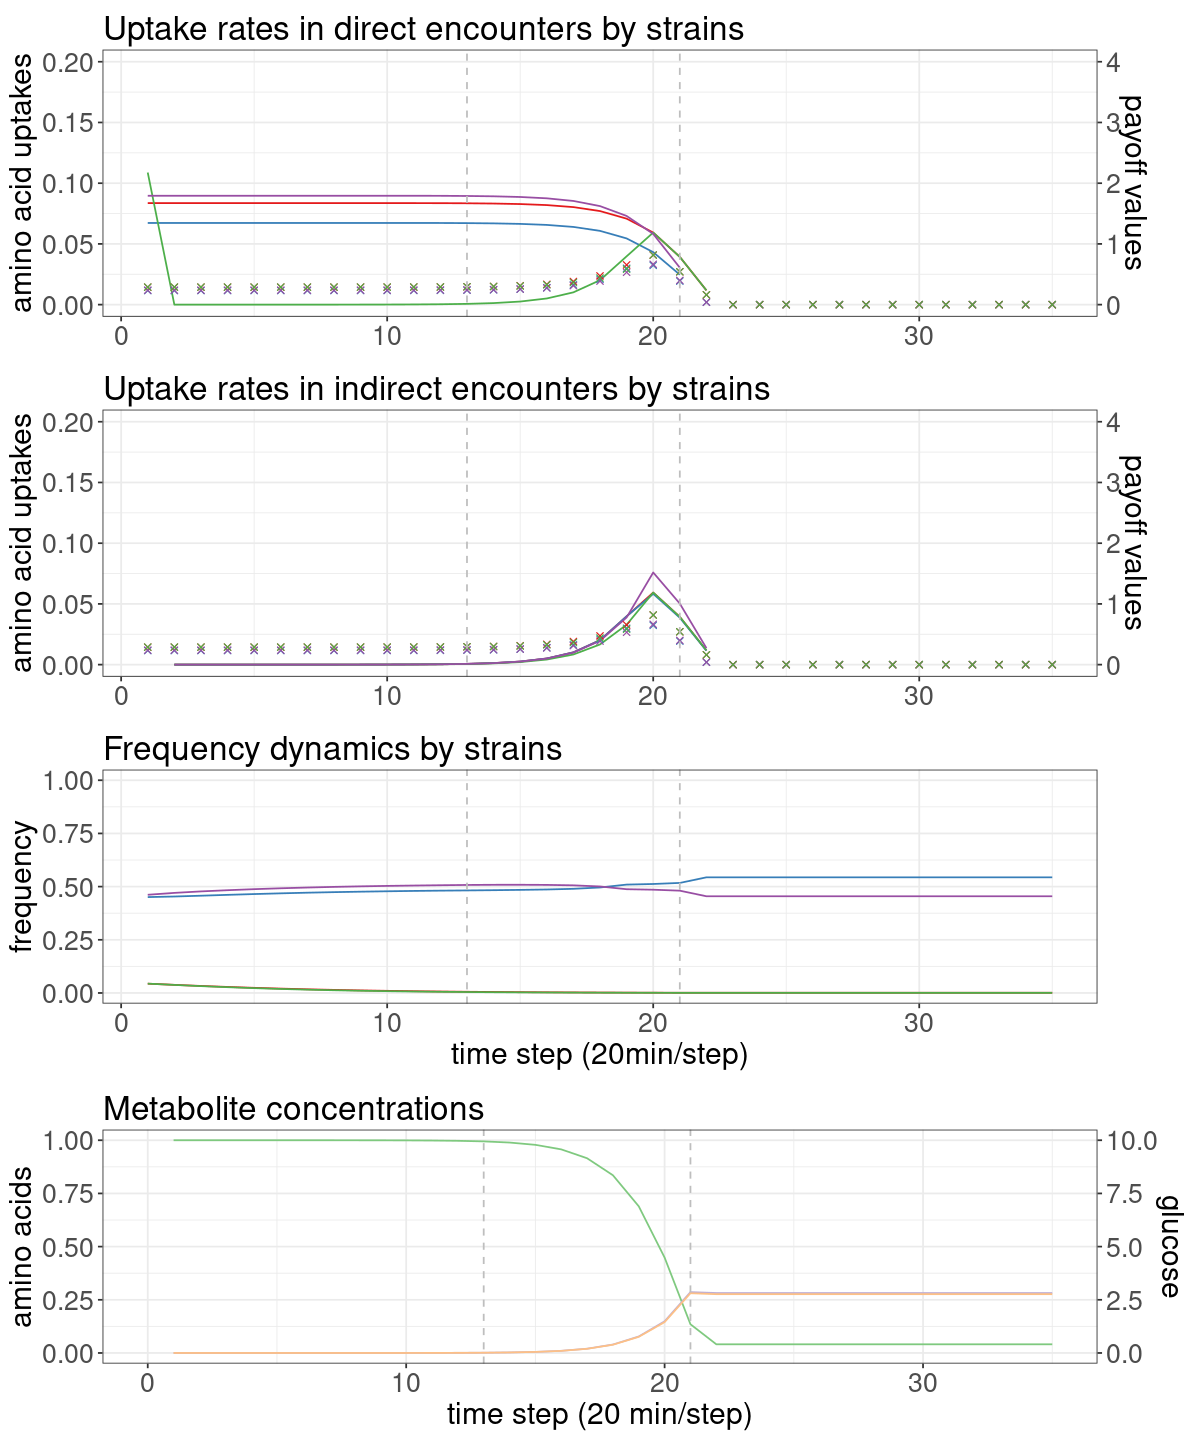

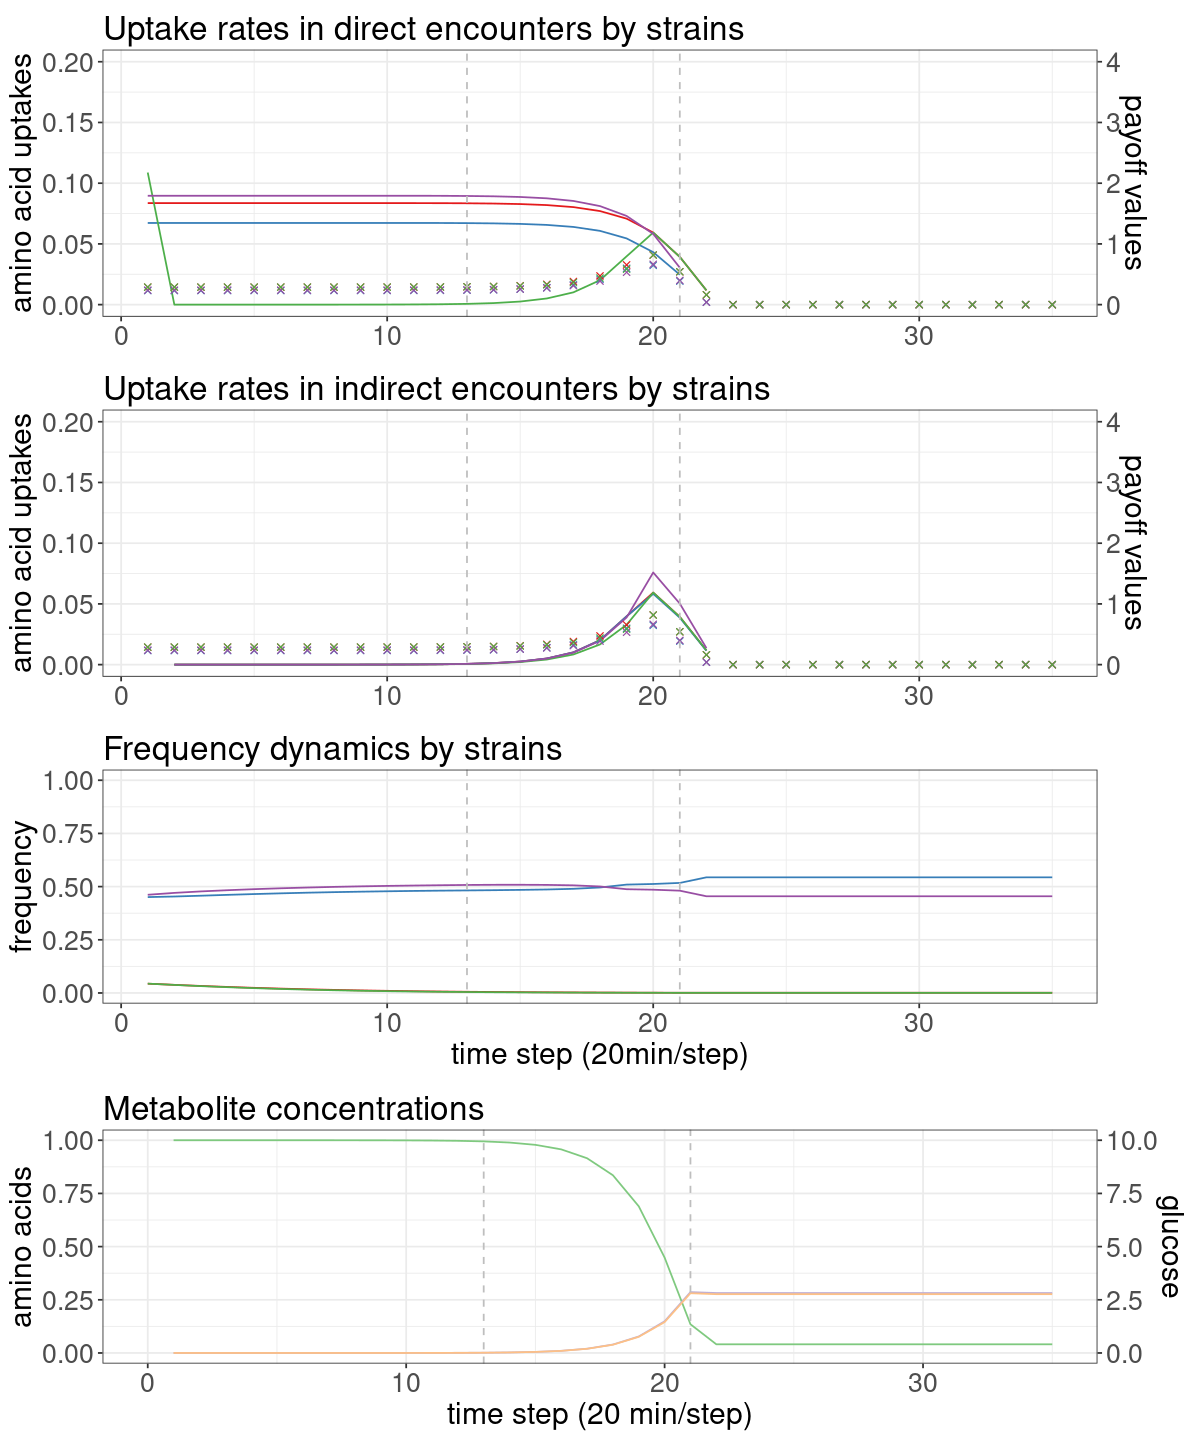

In [122]:
#uptake rates against time
uptake_df <- uptake_df_keep
concentration_df <- concentration_df_keep
##### Assuming you have a list of 25 datasets named dataset_list
# rxn_order <- c('EX_glc__D_e', 'EX_ile__L_e', 'EX_lys_e')
# combined_single <- combined_ls[3]
options(repr.plot.width = 10, repr.plot.height =12)
# plot_list1 <- lapply(combined_single, function(exp_data){
  # Create a plot for each dataset, e.g., ggplot2 plot
# Create line plot for dataset 1
    # frequency_df <- exp_data$frequency[[1]]
    # concentration_df <- exp_data$concentration[[1]]
start <-13
stop <- 21
uptake_df$payoff <- uptake_df$payoff*0.05
    plot1 <- ggplot(uptake_df, aes(x = time_step, y = met_dir,color = pheno)) +
      geom_line() +
      labs(title = "Uptake rates in direct encounters by strains", 
          x = NULL, y = "amino acid uptakes")+
  coord_cartesian(xlim = c(1, (iteration -1)), ylim = c(0., 0.2)) +
        scale_color_brewer(palette="Set1")+
        theme_bw()+
          theme(plot.title = element_text(hjust = 0, vjust =0, size = 20),
                legend.position = "none",axis.text = element_text(size = 16),axis.title = element_text(size = 18)) +
          geom_point(aes(y = payoff, color = pheno),shape=4) +
  scale_y_continuous(sec.axis = sec_axis(~ . * 20, name = "payoff values"))+
    geom_vline(xintercept = start, color = "grey", linetype = "dashed")+
    geom_vline(xintercept = stop, color = "grey", linetype = "dashed")

# uptake_df$payoff <- uptake_df$payoff*0.005
   plot2 <- ggplot(uptake_df, aes(x = time_step, y = met_indir,color = pheno)) +
      geom_line() +
      labs(title = "Uptake rates in indirect encounters by strains", 
          x = NULL, y = "amino acid uptakes")+
  coord_cartesian(xlim = c(1, (iteration -1)), ylim = c(0., 0.2)) +
        scale_color_brewer(palette="Set1")+
        theme_bw()+
          theme(plot.title = element_text(hjust = 0, vjust =0, size = 20),
                legend.position = "none",axis.text = element_text(size = 16),axis.title = element_text(size = 18)) +
          geom_point(aes(y = payoff, color = pheno),shape=4) +
  scale_y_continuous(sec.axis = sec_axis(~ . * 20, name = "payoff values"))+
    geom_vline(xintercept = start, color = "grey", linetype = "dashed")+
    geom_vline(xintercept = stop, color = "grey", linetype = "dashed")

#     # Create line plot for dataset 2
    plot3 <- ggplot(frequency_df, aes(x = time_step, y = frequency,color = pheno)) +
      geom_line() +
      labs(title = paste("Frequency dynamics by strains"), 
          x = "time step (20min/step)", y = "frequency")+
  coord_cartesian(xlim = c(1, (iteration-1)), ylim = c(0., 1.)) +
        scale_color_brewer(palette="Set1")+
        theme_bw()+
          theme(plot.title = element_text(hjust = 0.0, vjust = 0, size = 20),
                legend.position = "none",axis.text = element_text(size = 16),axis.title = element_text(size = 18))+
    geom_vline(xintercept = start, color = "grey", linetype = "dashed")+
    geom_vline(xintercept = stop, color = "grey", linetype = "dashed")
        concentration_df$glucose <- concentration_df$glucose * 0.1
     plot4 <- ggplot(concentration_df, aes(x = time_step)) +
          geom_line(aes(y = glucose, color = "D-Glucose")) +
          geom_line(aes(y = ile, color = "L-Isoleucine"))  +
          geom_line(aes(y = lys, color = "L-Lysine")) +
          scale_color_manual(values = c("D-Glucose" = "#7FC97F", "L-Isoleucine" = "#BEAED4", "L-Lysine" = "#FDC086")) +
        labs(title = paste("Metabolite concentrations"),x = "time step (20 min/step)", y = "amino acids")+
        coord_cartesian(xlim = c(0, (iteration -1)), ylim = c(0., 1.))+
                  scale_y_continuous(sec.axis = sec_axis(~ . * 10, name = "glucose")) + 
         theme_bw() +
          theme(plot.title = element_text(hjust = 0.0, vjust = 0, size = 20),legend.position = "none",axis.text = element_text(size = 16),axis.title = element_text(size = 18))+
    geom_vline(xintercept = start, color = "grey", linetype = "dashed")+
    geom_vline(xintercept = stop, color = "grey", linetype = "dashed")#,
                                      # panel.background = element_rect(fill='transparent'),
            
#     #Combine plots vertically
# combined_plot1 <- plot_grid(plot1, ncol = 1,align="v",axis = "lr")
# combined_plot2 <- plot_grid(plot3, plot4, ncol = 1,rel_heights = c(1.5,1),align="v",axis = "lr")
combined_plot <- plot_grid(plot1, plot2,plot3, plot4, ncol = 1,align="v",axis = "lr",rel_heights = c(1,1,1,1))
#,rel_heights = c(2, 1)
# return(combined_plot)
# })
# plot_list <- c(plot1, plot2,plot3, plot4)
print(combined_plot)

# plot1 <- grid.arrange(grobs = plot_list, ncol=1, width=rep(4,1), height=rep(4,4))

# plot1 <- grid.arrange(grobs = plot_list1, ncol=1, width=rep(4,1), height=rep(4,1))

# plot2 <- grid.arrange(grobs = plot_list2, ncol=1, width=rep(4,1), height=rep(4,1))


# Arrange plots in a 5x5 grid
ggsave(
  "../results/png/uptake0101.png",
print(combined_plot),
  width = 10,
  height = 12,
  dpi = 100
)


In [195]:
combined_single

X,frequency,abundance,concentration,payoff,metabolite_ls
<int>,<chr>,<chr>,<chr>,<chr>,<chr>
0,"[0.45, 0.45, 0.05, 0.05]","[4.5e-07, 4.5e-07, 5e-08, 5e-08]","[10.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
1,"[0.45072414999999993, 0.4616219499999999, 0.04377824999999999, 0.043875649999999995]","[9.014483e-07, 9.232438999999999e-07, 8.75565e-08, 8.77513e-08]","[9.999994180050878, 1.5466709789794063e-07, 1.512664395784382e-07]","[0.0, 0.2314828628816656, 0.0, 0.0, 0.2377613509823196, 0.0, 0.0, 0.0, 0.0, 0.28770889689486306, 0.0, 0.0, 0.28850476156342747, 0.0, 0.0, 0.0]","[[-4.390000000000001, 0.0, 0.0], [-9.990009990009991, -0.06725248467014742, 1.0], [-9.990009990009991, 0.0, 1.0], [-9.990009990009991, 0.0, 1.0], [-9.990009990009991, 1.0, -0.08964387544491967], [-9.990009990009991, 0.0, 0.0], [-9.990009990009991, 1.0, 0.0], [-9.990009990009991, 1.0, 0.0], [-4.390000000000001, 0.0, 0.0], [-9.990009990009991, -0.08358777810596767, 0.0], [-9.973198074277885, 0.0, 0.0], [-9.973198074277885, 0.0, 0.0], [-9.990009990009991, 0.0, -0.10877581576651388], [-9.990009990009991, 0.0, 0.0], [-9.990009990009991, 0.0, 0.0], [-9.990009990009991, 0.0, 0.0]]"
2,"[0.453463425, 0.47050897499999994, 0.038151124999999994, 0.037876475]","[1.8138537000000003e-06, 1.8820359000000001e-06, 1.526045e-07, 1.5150590000000001e-07]","[9.999980860479756, 4.651270734528949e-07, 4.5362510452315645e-07]","[5.323637154911925e-07, 0.23148287122348662, 5.323637154911925e-07, 5.323637154911925e-07, 0.23776135866691486, 4.408031203383782e-07, 4.408031203383782e-07, 4.408031203383782e-07, 5.323637154911925e-07, 0.2877089043861736, 5.323637154911925e-07, 5.323637154911925e-07, 0.2885047692480115, 4.408031203383782e-07, 4.408031203383782e-07, 4.408031203383782e-07]","[[-9.99000998420166, -1.5466709789794063e-07, 0.0], [-9.99000998420166, -0.06725248709368833, 0.9999998487335604], [-9.99000998420166, -1.5466709789794063e-07, 0.9999998487335604], [-9.99000998420166, -1.5466709789794063e-07, 0.9999998487335604], [-9.99000998420166, 0.9999998453329021, -0.08964387834226355], [-9.99000998420166, 0.0, -1.512664395784382e-07], [-9.99000998420166, 0.9999998453329021, -1.512664395784382e-07], [-9.99000998420166, 0.9999998453329021, -1.512664395784382e-07], [-9.973202581977587, -1.5466709789794063e-07, 0.0], [-9.99000998420166, -0.08358778028241062, -1.512664395784382e-07], [-9.99000998420166, -1.5466709789794063e-07, -1.512664395784382e-07], [-9.99000998420166, -1.5466709789794063e-07, -1.512664395784382e-07], [-9.99000998420166, -1.5466709789794063e-07, -0.10877581866390239], [-9.99000998420166, -1.2806608974878867e-07, -1.512664395784382e-07], [-9.99000998420166, -1.2806608974878867e-07, -1.512664395784382e-07], [-9.99000998420166, -1.2806608974878867e-07, -1.512664395784382e-07]]"
3,"[0.45722211250000006, 0.4774339375, 0.0330486625, 0.032295287500000006]","[3.6577769000000004e-06, 3.8194715e-06, 2.643893e-07, 2.583623e-07]","[9.99995471673148, 1.0872089139747784e-06, 1.05853045253454e-06]","[1.6009660772346132e-06, 0.2314828878502088, 1.6009660772346132e-06, 1.6009660772346132e-06, 0.23776137404597153, 1.3219016861565168e-06, 1.3219016861565168e-06, 1.3219016861565168e-06, 1.6009660772346132e-06, 0.28770891931285497, 1.6009660772346132e-06, 1.6009660772346132e-06, 0.28850478462707774, 1.3219016861565168e-06, 1.3219016861565168e-06, 1.3219016861565168e-06]","[[-9.990009970908654, -4.651270734528949e-07, 0.0], [-9.990009970908654, -0.0672524919242333, 0.9999995463748955], [-9.990009970908654, -4.651270734528949e-07, 0.9999995463748955], [-9.990009970908654, -4.651270734528949e-07, 0.9999995463748955], [-9.990009970908654, 0.9999995348729266, -0.08964388414068045], [-9.990009970908654, 0.0,

In [194]:
##### Assuming you have a list of 25 datasets named dataset_list
# rxn_order <- c('EX_glc__D_e', 'EX_ile__L_e', 'EX_lys_e')
# combined_single <- combined_ls[3]
exp_data <- combined_single[1]
options(repr.plot.width = 5, repr.plot.height =5)
# plot_list1 <- lapply(combined_single, function(exp_data){
  # Create a plot for each dataset, e.g., ggplot2 plot
# Create line plot for dataset 1
    frequency_df <- exp_data$frequency[[1]]
    concentration_df <- exp_data$concentration[[1]]
    plot1 <- ggplot(frequency_df, aes(x = time_step, y = frequency,color = pheno)) +
      geom_line() +
      labs(title = paste("ile = ",exp_data$arg_leakiness,"\nlys = ",exp_data$leu_leakiness), 
          x = NULL, y = "frequency")+
  coord_cartesian(xlim = c(0, (iteration -1)), ylim = c(0., 1.)) +
        scale_color_brewer(palette="Set1")+
        theme_bw()+
          theme(plot.title = element_text(hjust = 0, vjust = -10),
                legend.position = "right") 

    # Create line plot for dataset 2
    plot2 <- ggplot(concentration_df, aes(x = time_step))  +
          geom_line(aes(y = glucose, color = "D-Glucose")) +
          geom_line(aes(y = ile, color = "L-Isoleucine"))  +
          geom_line(aes(y = lys, color = "L-Lysine")) +
          scale_color_manual(values = c("D-Glucose" = "#7FC97F", "L-Isoleucine" = "#BEAED4", "L-Lysine" = "#FDC086")) +
        labs(x = "time step (min)", y = "Amino acid concentration")+
        # scale_color_brewer(palette="Accent") +
        #     # labs(color = "Metabolite concentrations") +
            theme_bw()+
  coord_cartesian(xlim = c(0, (iteration -1)), ylim = c(0., 1.)) +
          theme(legend.position = "right") +
  scale_y_continuous(sec.axis = sec_axis(~ . * 10, name = "Glucose concentration"))

    #Combine plots vertically
combined_plot <- plot_grid(plot1, plot2, ncol = 1,rel_heights = c(2, 1))#,rel_heights = c(2, 1)
# return(combined_plot)
# })


# plot1 <- grid.arrange(grobs = plot_list1, ncol=5, width=rep(4,5), height=rep(4,5))

plot1 <- grid.arrange(grobs = plot_list1, ncol=1, width=rep(4,1), height=rep(4,1))

# plot2 <- grid.arrange(grobs = plot_list2, ncol=1, width=rep(4,1), height=rep(4,1))


# Arrange plots in a 5x5 grid
# ggsave(
#   "../results/png/invasion-20_02v10_01-36min-ile_lys_1_3_legend.png",
#   grid.arrange(grobs=plot_list1, ncol=1, widths = rep(4, 1), heights = rep(8, 1)),
#   width = 5,
#   height = 5,
#   dpi = 100
# )


ERROR: [1m[33mError[39m in `geom_line()`:[22m
[1m[22m[33m![39m Problem while computing aesthetics.
[36mℹ[39m Error occurred in the 1st layer.
[1mCaused by error in `FUN()`:[22m
[33m![39m object 'time_step' not found


In [125]:
brewer.pal(n=4, name = "Set1")

[1] "#E41A1C" "#377EB8" "#4DAF4A" "#984EA3"